# Investigating the impact of income, housing costs and education on voter turnout and party preference on the East and West Coasts of the United States

In [ ]:
## Table of Contents
1. [Introduction](#Introduction)
2. [Exporatory Data Analysis](#Exploratory-Data-Analysis)
3. []

## Introduction


The topic of investigation for our final project is looking at the relationship between income, housing costs and education level on voter turnout and party preference in various regions of the East and West Coasts in the United States. Specifically, we hope to answer questions like those below:

- Do counties with higher income and/or higher housing value have higher voter turnout? What are the trends in party preference/do we see any correlations?
- What influence does the number of years in education have on voting turnout and party preference?
- How do these factors (education, income, housing value, party preference) differ between states on the East and West coasts? Are there any trends that jump out to us?

#### Data Preparation

In the first part of our project, we will be exploring the data at the state level. For instance, choosing a sample state, selecting variables to work with, viewing the observations, and visualizing the relationship between selected variables.

We are give the path for parquet files

In [5]:
gcs_path = 'gs://pstat135-voter-file/VM2Uniform'

We will first import the packages 

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

We have divided the dataset into the East and West Coast and selected states from each coast. The states we will be investigating are:
#### East Coast

- Connecticut (CT)
- Florida (FL)
- Massachusetts (MA)
- New York (NY)
- Rhode Island (RI)
- Vermont (VT)

#### West Coast
- Arizona (AZ)
- California (CA)
- Texas (TX)
- Washington (WA)

First, I explored the columns/variables in each state dataset by opening the tab files in Microsoft Excel. This is an example (sample image of exploring the Wyoming voter data, because it is one of the smaller files and can be opened on a local computer).A tab file is like a CSV file (comma separated values) except the data is separated by tab spaces instead. While .tab files can be opened in Microsoft Notepad, I find that Excel formats the values in a neater fashion which allows us to explore the variables more easily. I followed this tutorial to open the .tab file in Microsoft Excel. https://windowsreport.com/open-tab-file/

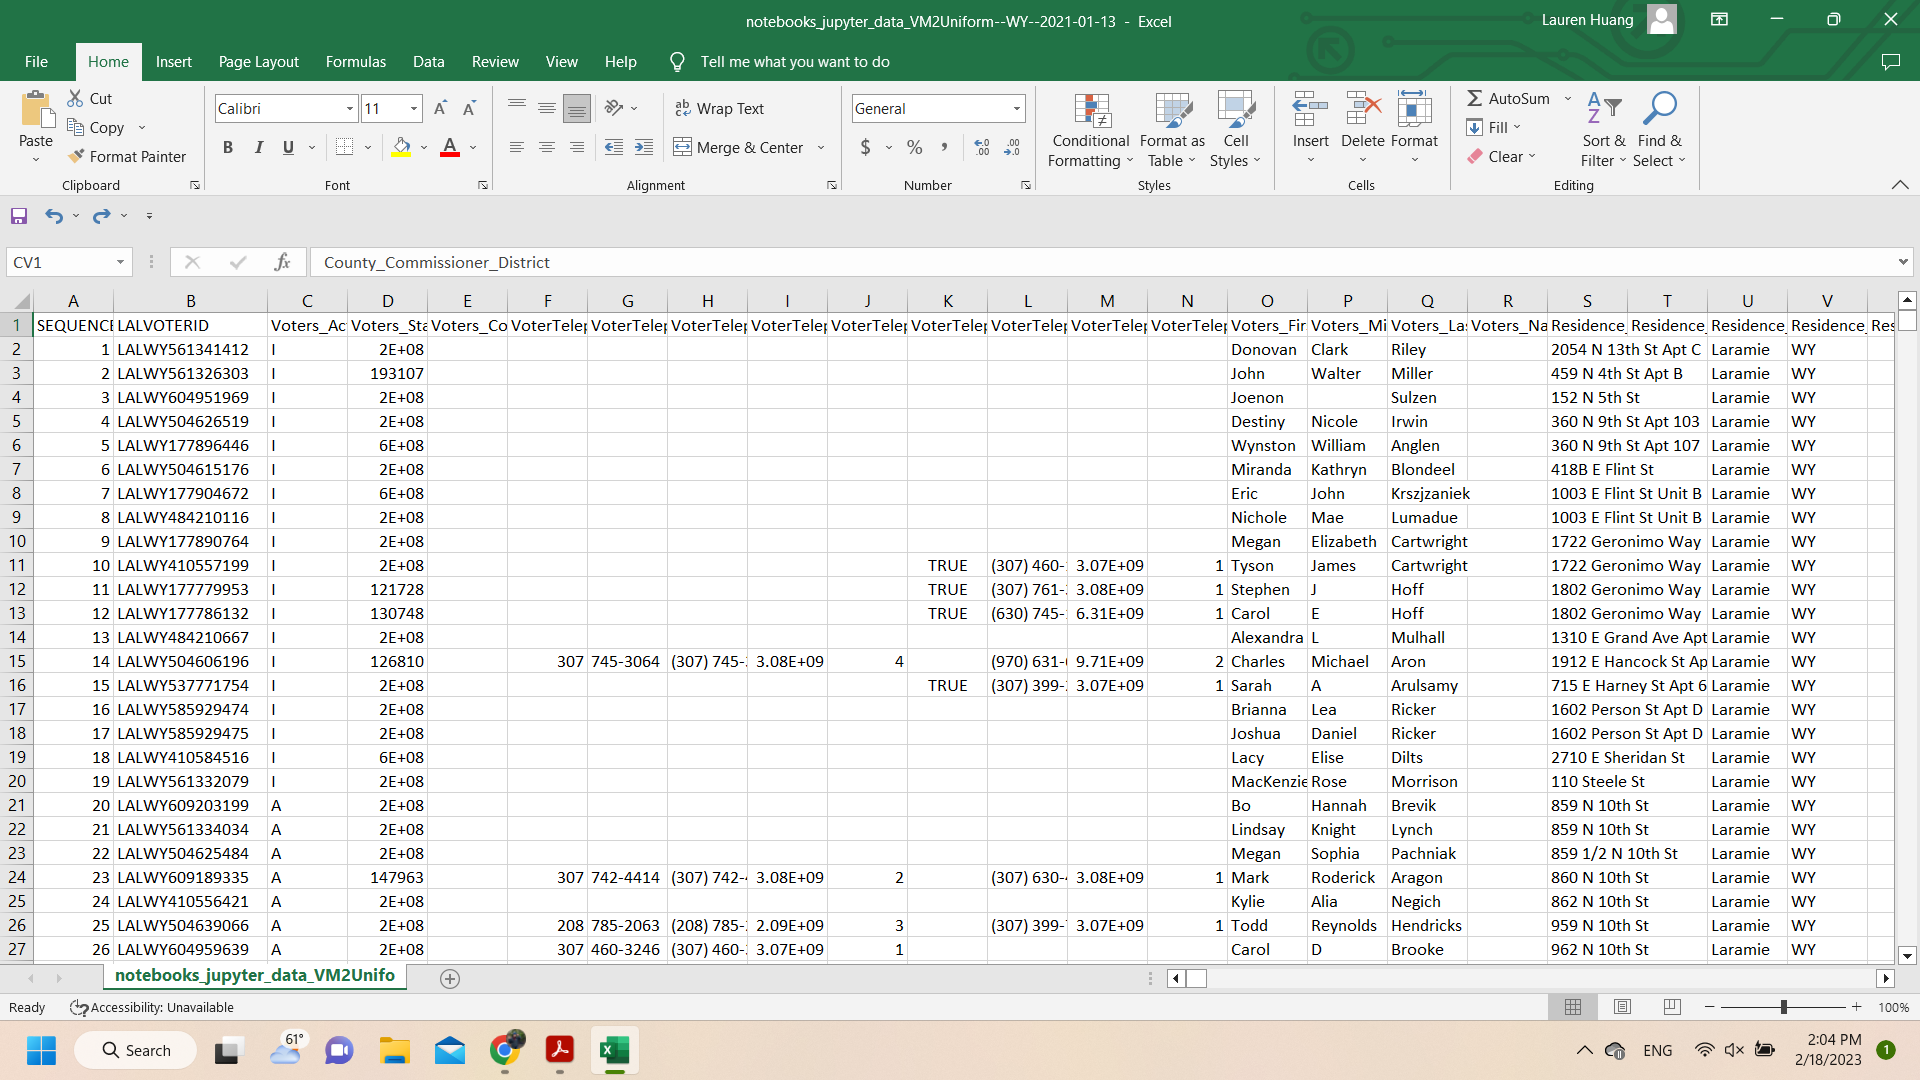

For the sake of this project, we will be looking at both Inactive and Active voter data. According to the Orange County Voter website, the difference  is that inactive voters are still registered and eligible to vote, but have either moved or mail that is not deliverable. https://ocvote.gov/registration/inactive-voters

## Exploratory Data Analysis

Now, let's start reading in the data for our states. We will first load the voter dataset for California

In [1]:
# load in data parquet files
df_CA = spark.read.parquet("/".join([gcs_path, 'VM2Uniform--CA--2021-05-02']))

The variables we have selected are:
- Parties_Description
- CommercialData_AreaMedianEducationYears
- CommercialData_EstimatedAreaMedianHHIncome
- CommercialData_AreaMedianHousingValue

For future parts and updates of our project, we will be using variables such as these that represent voter turnout by county in the General and Primary election.

#### "G" stands for General election
- ElectionReturns_G08CountyTurnoutAllRegisteredVoters
- ElectionReturns_G10CountyTurnoutAllRegisteredVoters
- ElectionReturns_G12CountyTurnoutAllRegisteredVoters
- ElectionReturns_G14CountyTurnoutAllRegisteredVoters
- ElectionReturns_G16CountyTurnoutAllRegisteredVoters
- ElectionReturns_G18CountyTurnoutAllRegisteredVoters

#### "P stands for Primary election
- ElectionReturns_P08CountyTurnoutAllRegisteredVoters
- ElectionReturns_P10CountyTurnoutAllRegisteredVoters
- ElectionReturns_P12CountyTurnoutAllRegisteredVoters
- ElectionReturns_P14CountyTurnoutAllRegisteredVoters
- ElectionReturns_P16CountyTurnoutAllRegisteredVoters
- ElectionReturns_P18CountyTurnoutAllRegisteredVoters

**note**: we need to be careful when looking at county names, because counties in 2 different states may share the same name. We can use the FIPS unique codes matched to each county from the uscounties.csv file

For now, let's first take a look at the variables we want to observe the influence of. That would be description of the voter's party, median years of education, median income in their living area, and median value of housing in their living area. To display all the entries would be too much, let's see the first 5 observations of each variable in the state of California.

In [2]:
# prints schema for California data
#df_CA.printSchema()

# Which party each voter identifies with
df_CA.select("Parties_Description").show(5)

# Median years of education in an area
df_CA.select("CommercialData_AreaMedianEducationYears").show(5)

# Estimated median income in a certain area
df_CA.select("CommercialData_EstimatedAreaMedianHHIncome").show(5)

# Median housing value in a certain area
df_CA.select("CommercialData_AreaMedianHousingValue").show(5)

+-------------------+
|Parties_Description|
+-------------------+
|         Republican|
|         Republican|
|       Non-Partisan|
|  Peace and Freedom|
|         Democratic|
+-------------------+
only showing top 5 rows

+---------------------------------------+
|CommercialData_AreaMedianEducationYears|
+---------------------------------------+
|                                     12|
|                                   null|
|                                     12|
|                                     12|
|                                   null|
+---------------------------------------+
only showing top 5 rows

+------------------------------------------+
|CommercialData_EstimatedAreaMedianHHIncome|
+------------------------------------------+
|                                    $57357|
|                                      null|
|                                    $57357|
|                                    $57357|
|                                      null|
+-------------

#### We can also visualize the variables below:

In [6]:
# create visualizations here
# California
df_CA = spark.read.parquet("/".join([gcs_path, 'VM2Uniform--CA--2021-05-02']))
# New York
df_NY = spark.read.parquet("/".join([gcs_path, 'VM2Uniform--NY--2021-03-15']))
# Arizona
df_AZ = spark.read.parquet("/".join([gcs_path, 'VM2Uniform--AZ--2021-05-20']))
# Massachusetts
df_MA = spark.read.parquet("/".join([gcs_path, 'VM2Uniform--MA--2021-01-19']))

In [6]:
CA_Visualize_Edu = df_CA.select("CommercialData_AreaMedianEducationYears").toPandas()
AZ_Visualize_Edu = df_AZ.select("CommercialData_AreaMedianEducationYears").toPandas()
NY_Visualize_Edu = df_NY.select("CommercialData_AreaMedianEducationYears").toPandas()
MA_Visualize_Edu = df_MA.select("CommercialData_AreaMedianEducationYears").toPandas()

Dropping the `na` values,

In [10]:
CA_Visualize_Edu = CA_Visualize_Edu.dropna()
AZ_Visualize_Edu = AZ_Visualize_Edu.dropna()
NY_Visualize_Edu = NY_Visualize_Edu.dropna()
MA_Visualize_Edu = MA_Visualize_Edu.dropna()

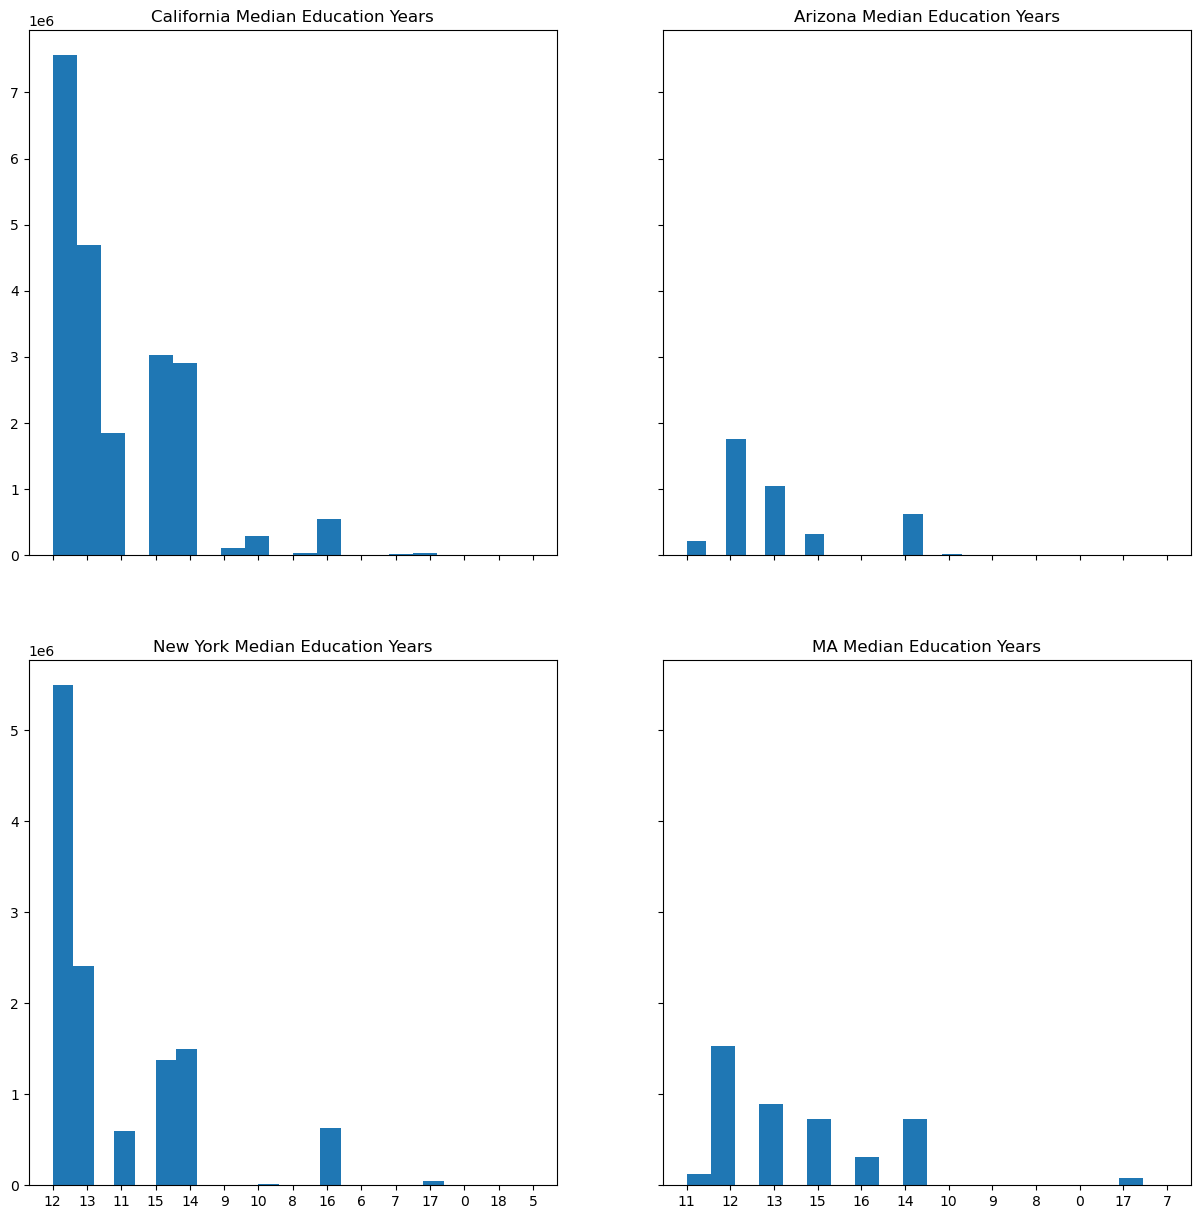

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(15, 15))
ax[0,0].hist(CA_Visualize_Edu, bins = 20)
ax[0,0].set_title("California Median Education Years")
ax[0,1].hist(AZ_Visualize_Edu, bins = 20)
ax[0,1].set_title("Arizona Median Education Years")
ax[1,0].hist(NY_Visualize_Edu, bins = 20)
ax[1,0].set_title("New York Median Education Years")
ax[1,1].hist(MA_Visualize_Edu, bins = 20)
ax[1,1].set_title("MA Median Education Years")
plt.show()

We can see from the above that even though the number of voters in each state is different, the median education year between the states are similar. 

We are also interested in the relationship between education years and median income. Without the loss of generality we choose Arizona and Massachussets.

In [7]:
AZ_Visualize_Edu_Inc = df_AZ.select("CommercialData_AreaMedianEducationYears","CommercialData_EstimatedAreaMedianHHIncome",'Parties_Description').toPandas().dropna()
MA_Visualize_Edu_Inc = df_MA.select("CommercialData_AreaMedianEducationYears","CommercialData_EstimatedAreaMedianHHIncome",'Parties_Description').toPandas().dropna()
AZ_Visualize_Edu_Inc["CommercialData_EstimatedAreaMedianHHIncome"]= AZ_Visualize_Edu_Inc["CommercialData_EstimatedAreaMedianHHIncome"].str[1:].astype(float)
MA_Visualize_Edu_Inc["CommercialData_EstimatedAreaMedianHHIncome"]= MA_Visualize_Edu_Inc["CommercialData_EstimatedAreaMedianHHIncome"].str[1:].astype(float)

Text(0, 0.5, 'Education Year')

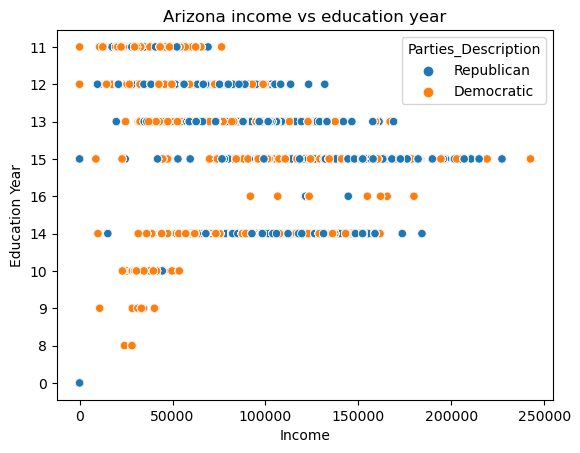

In [10]:
AZ_filtered = AZ_Visualize_Edu_Inc.query("Parties_Description=='Republican' | Parties_Description=='Democratic'")
sns.scatterplot(x=AZ_filtered["CommercialData_EstimatedAreaMedianHHIncome"], y=AZ_filtered["CommercialData_AreaMedianEducationYears"], hue = AZ_filtered['Parties_Description'])
plt.title('Arizona income vs education year')
# Set x-axis label
plt.xlabel('Income')
# Set y-axis label
plt.ylabel('Education Year')

Text(0, 0.5, 'Education Year')

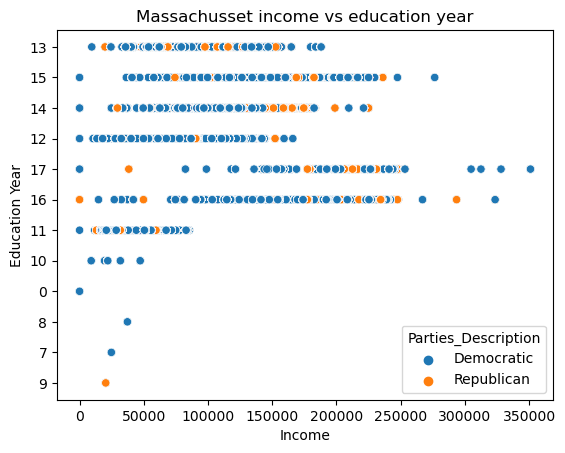

In [11]:
MA_filtered = MA_Visualize_Edu_Inc.query("Parties_Description=='Republican' | Parties_Description=='Democratic'")
import seaborn as sns
sns.scatterplot(x=MA_filtered["CommercialData_EstimatedAreaMedianHHIncome"], y=MA_filtered["CommercialData_AreaMedianEducationYears"], hue = MA_filtered['Parties_Description'])
plt.title('Massachusset income vs education year')
# Set x-axis label
plt.xlabel('Income')
# Set y-axis label
plt.ylabel('Education Year')

We can see from the above two graphs that if we look at the relationship between income and education. We found out that the pattern is unanimous across the states: people having more income tend to have longer education years. And It seems A person's party is not related to income and education year

#### Party Distribution

Next, We are trying to visualize to party distribution in the following states

- Rhode Island
- Conneticut
- Utah
- Washington

The first step is to read the parquet files from the bucket and convert them to pandas dataframes

In [2]:
df_RI = spark.read.parquet("/".join([gcs_path, 'VM2Uniform--RI--2021-03-16']))
df_CT = spark.read.parquet("/".join([gcs_path, 'VM2Uniform--CT--2021-03-30']))
df_UT = spark.read.parquet("/".join([gcs_path, 'VM2Uniform--UT--2021-03-26']))
df_WA = spark.read.parquet("/".join([gcs_path, 'VM2Uniform--WA--2020-12-09']))

In [3]:
RI_party = df_RI.select("Parties_Description").toPandas()
CT_party = df_CT.select("Parties_Description").toPandas()
UT_party = df_UT.select("Parties_Description").toPandas()
WA_party = df_WA.select("Parties_Description").toPandas()

In [4]:
RI_party.value_counts()

Parties_Description
Democratic             330087
Non-Partisan           329740
Republican             106431
dtype: int64

/opt/conda/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Party Distribution in Rhode Island')]

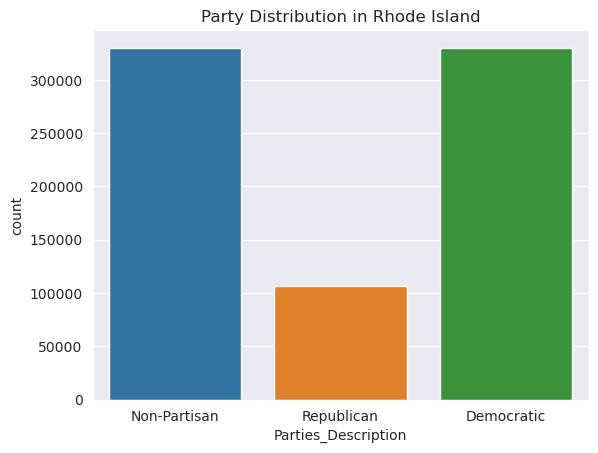

In [10]:
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(RI_party['Parties_Description']).set(title='Party Distribution in Rhode Island')

In [28]:
CT_party['Parties_Description'].value_counts()

Non-Partisan              982140
Democratic                874649
Republican                476713
Registered Independent     33936
Libertarian                 3572
Green                       1530
Working Family Party         352
Other                        130
Independence                  75
Citizens                      44
Reform                        12
Name: Parties_Description, dtype: int64

In [26]:
CT_Visualize = CT_party[(CT_party['Parties_Description']=='Democratic') |
                        (CT_party['Parties_Description']=='Non-Partisan') |
                        (CT_party['Parties_Description']=='Republican') |
                        (CT_party['Parties_Description']=='Registered Independent')]

/opt/conda/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Party Distribution in Conneticut')]

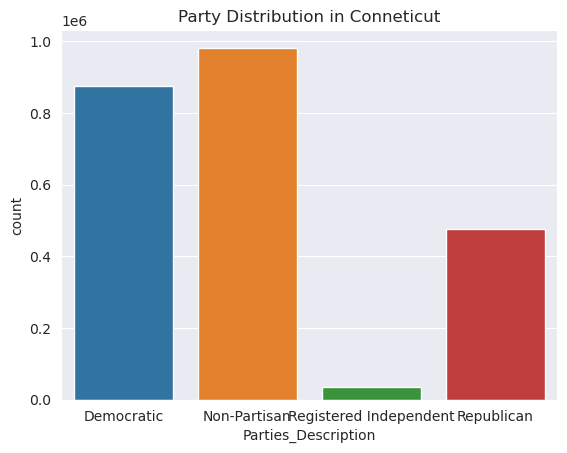

In [27]:
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(CT_Visualize['Parties_Description']).set(title='Party Distribution in Conneticut')

In [37]:
UT_party['Parties_Description'].value_counts()

Republican                745927
Non-Partisan              420327
Democratic                208337
American Independent       43886
Libertarian                14926
Constitution                5033
Other                       3526
Green                       1826
Registered Independent      1268
American                     678
Reform                        22
Socialist                     14
Taxpayers                     10
Worker's Party                 4
Patriot                        2
Populist                       1
Name: Parties_Description, dtype: int64

In [38]:
UT_Visualize = UT_party[(UT_party['Parties_Description']=='Democratic') |
                        (UT_party['Parties_Description']=='Non-Partisan') |
                        (UT_party['Parties_Description']=='Republican') |
                        (UT_party['Parties_Description']=='American Independent')]

/opt/conda/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Party Distribution in UT')]

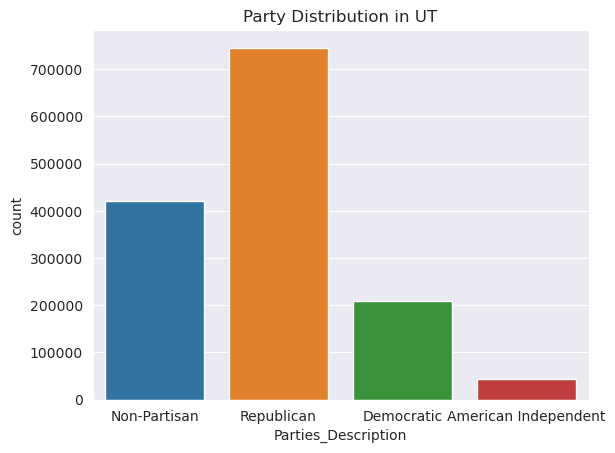

In [39]:
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(UT_Visualize['Parties_Description']).set(title='Party Distribution in UT')

In [40]:
WA_party['Parties_Description'].value_counts()

Democratic      2642266
Republican      1339485
Non-Partisan     983257
Name: Parties_Description, dtype: int64

In [41]:
WA_Visualize = WA_party[(WA_party['Parties_Description']=='Democratic') |
                        (WA_party['Parties_Description']=='Non-Partisan') |
                        (WA_party['Parties_Description']=='Republican')]

/opt/conda/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Party Distribution in Washington')]

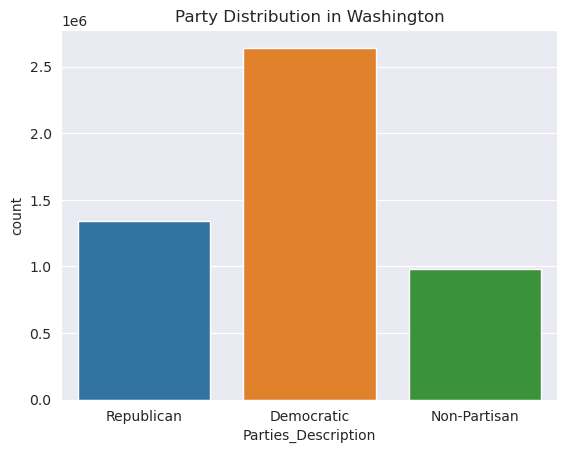

In [42]:
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(WA_Visualize['Parties_Description']).set(title='Party Distribution in Washington')

From the political party preference plot, it seems that Rhode Island and Connecticut, the two east coast states, have a relatively even split between Democrats, Republicans, and Non-Partisan voters, while Utah and Washington, the two west coast states, have a larger proportion of Democratic voters.

This observation could be interesting for a number of reasons. For example, it could reflect broader political trends in the regions, such as the fact that the east coast has historically been seen as more moderate and centrist than the west coast, which is often considered more liberal. Alternatively, it could reflect specific local issues or dynamics that are driving voter preferences in each state.

Additionally, the differences between the two east coast states and the two west coast states could also be noteworthy. For instance, the higher proportion of Democratic voters in Washington and Utah compared to Rhode Island and Connecticut could suggest that Democratic values are more strongly represented on the west coast, while the more even distribution of political parties in the east coast states could suggest a more balanced political landscape.

Overall, analyzing the distribution of political party preference in different states can be a useful way to understand regional and local political trends and could provide valuable insights for political campaigns or other organizations that are interested in engaging with voters in these areas.

#### The next step in our final project will be to focus on and analyze the relationship between party preference, income, housing value, and education with voter turnout bewteen the general and primary elections. We want to pay attention to:
- What differences do we observe between the General and Primary elections? (Lauren)
- How might party preference, income, housing value, or education affect voter turnout in one election but not the other? or in both elections? (Yihan)
- How does voter turnout differ by county, and does this relationship have anything to do with the geographical location of the county with respect to other counties in that state? (Daniel)
- Can I predict Voter turnout from income, housing value, or education? Are there any (linear) correlation between these three columns and the voter turnout? (Teo)

In [1]:
gcs_path = 'gs://pstat135-voter-file/VM2Uniform'
AZ = spark.read.parquet("/".join([gcs_path, 'VM2Uniform--AZ--2021-05-20']))
CA = spark.read.parquet("/".join([gcs_path, 'VM2Uniform--CA--2021-05-02']))
FL = spark.read.parquet("/".join([gcs_path, 'VM2Uniform--FL--2021-05-19']))
GA = spark.read.parquet("/".join([gcs_path, 'VM2Uniform--GA--2021-04-16']))
NY = spark.read.parquet("/".join([gcs_path, 'VM2Uniform--NY--2021-03-15']))
TX = spark.read.parquet("/".join([gcs_path, 'VM2Uniform--TX--2021-06-12']))

#### Objective Question 1: What differences do we observe between the General and Primary elections?
To understand the trends in voter turnout between states on the East and West coasts, we need to first understand the difference between the 2 major types of elections that the data covers: General and Primary elections.

It is important to note that the difference between the two elections are: In primary elections there may be multiple candidates from one party running against all other candidates. General elections come after primary elections, and there is usually only one candidate representing each party.

Let's begin by taking a look at the voter turnout from one state on the West coast and one state on the East Coast. I'm going to choose California and New York, because these are heavily populated states with large cities (Los Angeles and New York City). Hopefully having the data from a larger population will help us see important trends.

First, I will print the voter turnout by county and by election for two years (2008 and 2010). This will help us distinguish if there are any significant voting behavioral changes between the years.

In [2]:
from pyspark.sql.functions import col

# California voter turnout (General 08)
df_CA_G08 = CA.select(col('County'),col('ElectionReturns_G08CountyTurnoutAllRegisteredVoters')).toPandas().drop_duplicates()

# see the counties
print(df_CA_G08)

                  County ElectionReturns_G08CountyTurnoutAllRegisteredVoters
0                   LAKE                                                74% 
25864             LASSEN                                                82% 
41018        LOS ANGELES                                                78% 
55834              MARIN                                                91% 
74087           MARIPOSA                                                83% 
85857          MENDOCINO                                                80% 
111265            SHASTA                                                84% 
146697            SIERRA                                                87% 
148936          SISKIYOU                                                82% 
167543             BUTTE                                                81% 
224948    SAN BERNARDINO                                                74% 
278863            MADERA                                                80% 

In the table above, we have the county names on the left and the voter turnout for that county on the right.

In [3]:
# California voter turnout (Primary 08)
df_CA_P08 = CA.select(col('County'), col('ElectionReturns_P08CountyTurnoutAllRegisteredVoters')).toPandas().drop_duplicates()

# see the counties
print(df_CA_P08)

                  County ElectionReturns_P08CountyTurnoutAllRegisteredVoters
0                   LAKE                                                31% 
25864             LASSEN                                                36% 
41018        LOS ANGELES                                                18% 
55834              MARIN                                                39% 
74087           MARIPOSA                                                40% 
85857          MENDOCINO                                                52% 
111265            SHASTA                                                34% 
146697            SIERRA                                                53% 
148936          SISKIYOU                                                43% 
167543             BUTTE                                                34% 
224948    SAN BERNARDINO                                                17% 
278863            MADERA                                                32% 

In [4]:
# remove percent sign from voter turnout using code below
# df['col'] = df['col'].str.rstrip('%').astype('float') / 100.0
df_CA_P08['ElectionReturns_P08CountyTurnoutAllRegisteredVoters'] = df_CA_P08['ElectionReturns_P08CountyTurnoutAllRegisteredVoters'].str.rstrip('%').astype('float') / 100.0
df_CA_G08['ElectionReturns_G08CountyTurnoutAllRegisteredVoters'] = df_CA_G08['ElectionReturns_G08CountyTurnoutAllRegisteredVoters'].str.rstrip('%').astype('float') / 100.0

We do the same to see voter turnout from the elections in 2010:

In [5]:
# California voter turnout (General 10)
df_CA_G10 = CA.select(col('County'),col('ElectionReturns_G10CountyTurnoutAllRegisteredVoters')).toPandas().drop_duplicates()

In [6]:
# California voter turnout (Primary 10)
df_CA_P10 = CA.select(col('County'), col('ElectionReturns_P10CountyTurnoutAllRegisteredVoters')).toPandas().drop_duplicates()

In [7]:
# remove percent sign from voter turnout
df_CA_P10['ElectionReturns_P10CountyTurnoutAllRegisteredVoters'] = df_CA_P10['ElectionReturns_P10CountyTurnoutAllRegisteredVoters'].str.rstrip('%').astype('float') / 100.0
df_CA_G10['ElectionReturns_G10CountyTurnoutAllRegisteredVoters'] = df_CA_G10['ElectionReturns_G10CountyTurnoutAllRegisteredVoters'].str.rstrip('%').astype('float') / 100.0

At first glance, we see that voter turnout rates in Primary elections are overall lower than voter turnout rates in General elections. 
What might be the cause for this lower turnout? 

A quick search online shows that one possible reason is "voters are bothered by the inconvenience of physically voting. Voters feel their vote will not count / the election has "already been won" by one side. Voters feel that it is not worth their while to educate themselves as to the issues, and hence their vote would not be worth making."

In other words, some voters might feel like their vote in the General election "counts more/weighs more" because whoever wins the General election will go on into office. Whereas whoever they vote for in Primary elections may or may not even make it to the General election.

#### Now that we've seen the voter turnout for California in the General and Primary elections (by county) for both 2008 and 2010, let's make plots to visualize. We can make a side by side bar graph to see the difference in voter turnout between the two elections.

          county            turnouts  value
0           LAKE  08 primary turnout   0.31
1         LASSEN  08 primary turnout   0.36
2    LOS ANGELES  08 primary turnout   0.18
3          MARIN  08 primary turnout   0.39
4       MARIPOSA  08 primary turnout   0.40
..           ...                 ...    ...
111   SACRAMENTO  08 general turnout   0.80
112  SANTA CLARA  08 general turnout   0.86
113   STANISLAUS  08 general turnout   0.71
114    SAN MATEO  08 general turnout   0.79
115   SAN BENITO  08 general turnout   0.79

[116 rows x 3 columns]


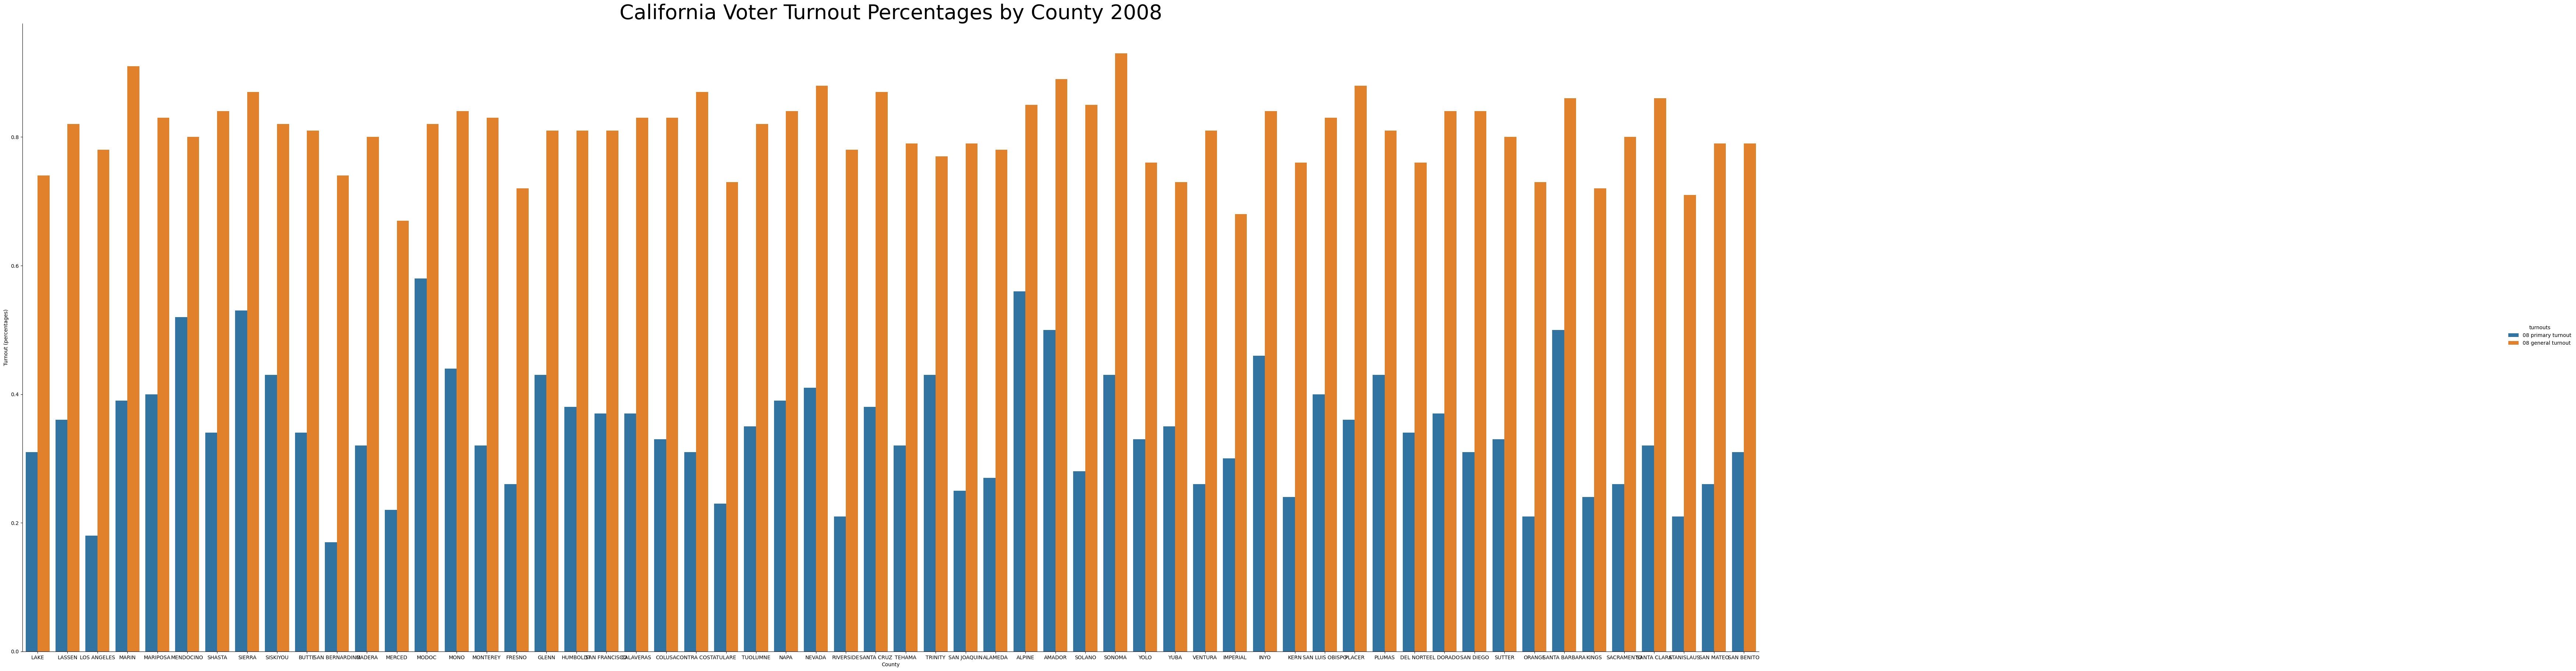

In [8]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# California 2008
dfs = pd.DataFrame(data={'county': df_CA_G08['County'], 
                         '08 primary turnout': df_CA_P08['ElectionReturns_P08CountyTurnoutAllRegisteredVoters'], 
                         '08 general turnout': df_CA_G08['ElectionReturns_G08CountyTurnoutAllRegisteredVoters']})

dfs1 = pd.melt(dfs, id_vars = "county")
dfs1 = dfs1.rename(columns={"variable": "turnouts"})

print(dfs1)

# side by side barplot for california 2008 elections
barplot_CA_08 = sns.catplot(x = 'county', y='value', 
               hue = 'turnouts', data=dfs1, kind='bar')
#add overall title
plt.title('California Voter Turnout Percentages by County 2008', fontsize=40)

#add axis titles
plt.xlabel('County')
plt.ylabel('Turnout (percentages)')

barplot_CA_08.fig.set_size_inches(80,20)

plt.show()

In the bar graph above, blue represents Primary election turnout and orange represents General election turnout for respective California counties in 2008. Bars that have values of 0 (or do not appear on the graph) means that there was either no recorded turnout for that county during a specific election or the turnout was 0%.

It is clear that the turnout for the General election is much higher than turnout for the Primary election. In some counties, turnout for the General election doubled that of the Primary election.

Let us make similar plots for the California elections in 2010. How much will this voter behavior within the same state change between years?

          county            turnouts  value
0           LAKE  10 primary turnout   0.46
1         LASSEN  10 primary turnout   0.48
2    LOS ANGELES  10 primary turnout   0.22
3          MARIN  10 primary turnout   0.49
4       MARIPOSA  10 primary turnout   0.56
..           ...                 ...    ...
111   SACRAMENTO  10 general turnout   0.63
112  SANTA CLARA  10 general turnout   0.67
113   STANISLAUS  10 general turnout   0.53
114    SAN MATEO  10 general turnout   0.65
115   SAN BENITO  10 general turnout   0.65

[116 rows x 3 columns]


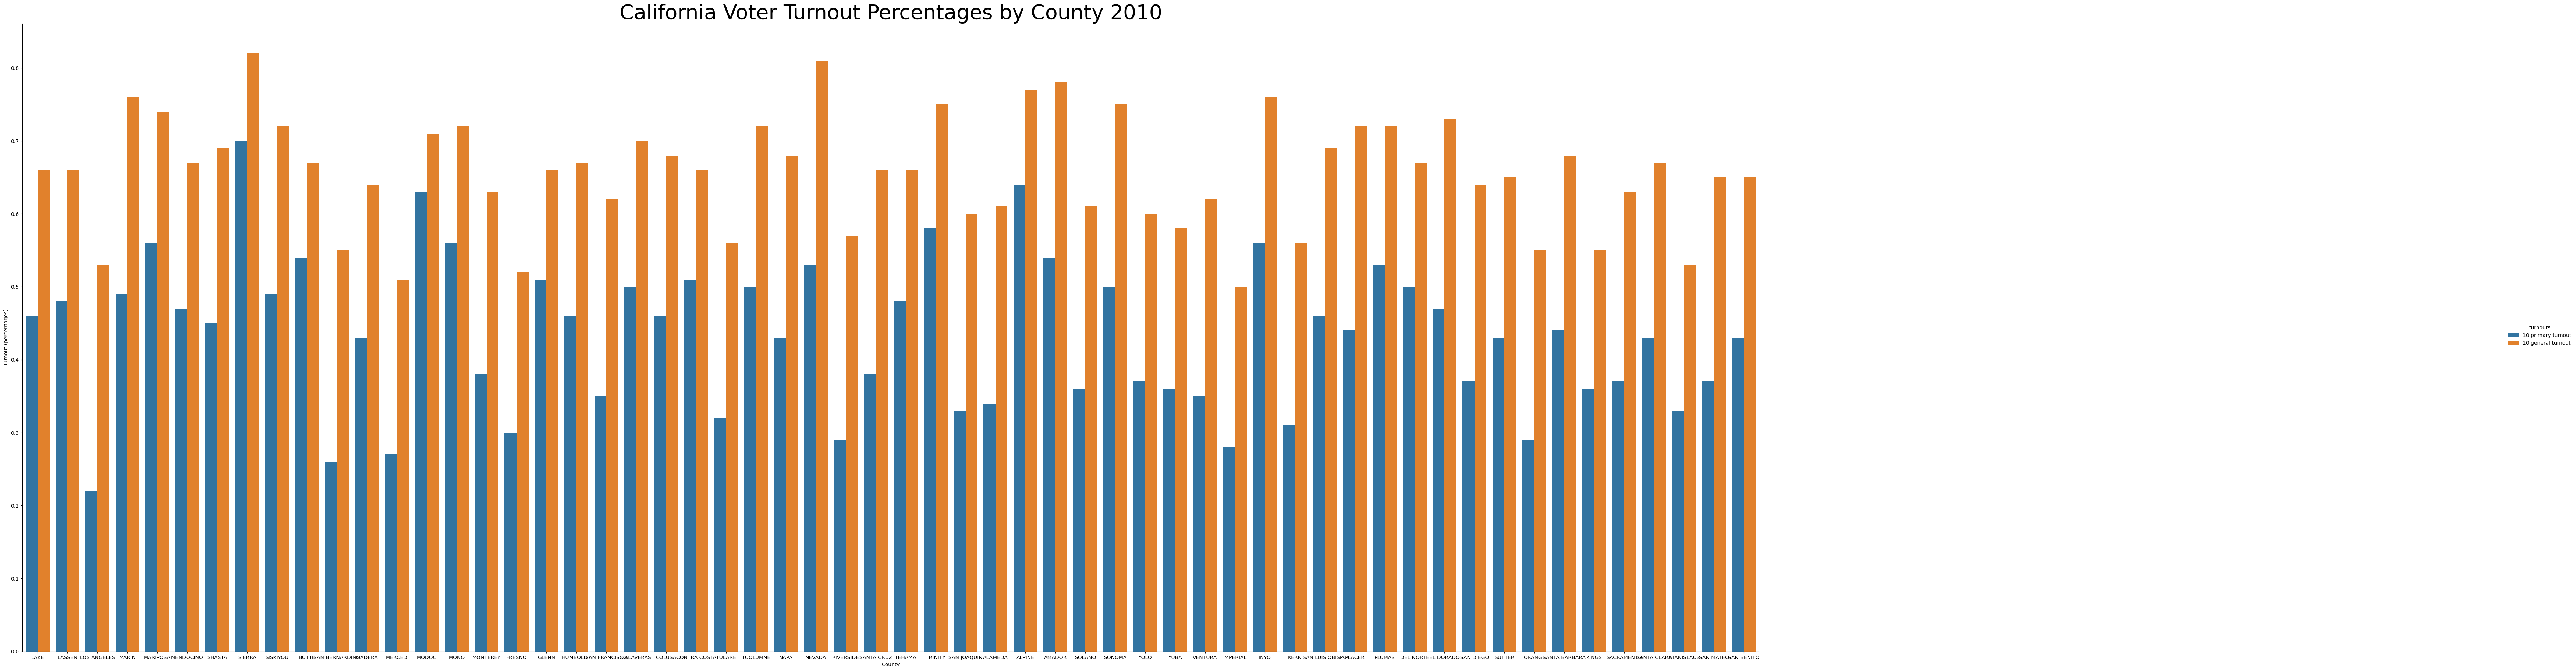

In [9]:
# California 2010
dfs = pd.DataFrame(data={'county': df_CA_G10['County'], 
                         '10 primary turnout': df_CA_P10['ElectionReturns_P10CountyTurnoutAllRegisteredVoters'], 
                         '10 general turnout': df_CA_G10['ElectionReturns_G10CountyTurnoutAllRegisteredVoters']})
dfs1 = pd.melt(dfs, id_vars = "county")
dfs1 = dfs1.rename(columns={"variable": "turnouts"})

print(dfs1)

# side by side barplot for california 2010 elections
barplot_CA_10 = sns.catplot(x = 'county', y='value', 
               hue = 'turnouts', data=dfs1, kind='bar')
#add overall title
plt.title('California Voter Turnout Percentages by County 2010', fontsize=40)

#add axis titles
plt.xlabel('County')
plt.ylabel('Turnout (percentages)')

barplot_CA_10.fig.set_size_inches(80,20)

plt.show()

In the 2010 elections, the General election still has greater turnout than the Primary election. However, the turnout for the Primary election with respect to the turnout for the General election in 2010 has increased significantly since 2008. Furthermore, there is much more consistent turnout compared to 2008. (most counties have turnout for both elections, less counties with turnout for just one election)

#### We repeat these same steps to observe and visualize the voter turnout data from New York.

In [10]:
# New York voter turnout (General 08)
df_NY_G08 = NY.select(col('County'), col('ElectionReturns_G08CountyTurnoutAllRegisteredVoters')).toPandas().drop_duplicates()

# see the counties
print(df_NY_G08)

              County ElectionReturns_G08CountyTurnoutAllRegisteredVoters
0            SUFFOLK                                                70% 
30320       SULLIVAN                                                52% 
63090       COLUMBIA                                                69% 
88560       CORTLAND                                                70% 
117811      DELAWARE                                                66% 
...              ...                                                ... 
3970794       NASSAU                                                66% 
4087572  WESTCHESTER                                                64% 
7268397      WYOMING                                                69% 
7294155        YATES                                                70% 
7308162     NEW YORK                                                59% 

[62 rows x 2 columns]


In [11]:
# New York voter turnout (Primary 08)
df_NY_P08 = NY.select(col('County'),col('ElectionReturns_P08CountyTurnoutAllRegisteredVoters')).toPandas().drop_duplicates()

# see the counties
print(df_NY_P08)

              County ElectionReturns_P08CountyTurnoutAllRegisteredVoters
0            SUFFOLK                                                 1% 
30320       SULLIVAN                                                 0% 
63090       COLUMBIA                                                 2% 
88560       CORTLAND                                                 0% 
117811      DELAWARE                                                 0% 
...              ...                                                ... 
3970794       NASSAU                                                 1% 
4087572  WESTCHESTER                                                 1% 
7268397      WYOMING                                                16% 
7294155        YATES                                                 0% 
7308162     NEW YORK                                                 7% 

[62 rows x 2 columns]


In [12]:
# remove percent sign from voter turnout
df_NY_P08['ElectionReturns_P08CountyTurnoutAllRegisteredVoters'] = df_NY_P08['ElectionReturns_P08CountyTurnoutAllRegisteredVoters'].str.rstrip('%').astype('float') / 100.0
df_NY_G08['ElectionReturns_G08CountyTurnoutAllRegisteredVoters'] = df_NY_G08['ElectionReturns_G08CountyTurnoutAllRegisteredVoters'].str.rstrip('%').astype('float') / 100.0

Do the same for 2010 elections:

In [13]:
# New York voter turnout (General 10)
df_NY_G10 = NY.select(col('County'), col('ElectionReturns_G10CountyTurnoutAllRegisteredVoters')).toPandas().drop_duplicates()

In [14]:
# New York voter turnout (Primary 10)
df_NY_P10 = NY.select(col('County'),col('ElectionReturns_P10CountyTurnoutAllRegisteredVoters')).toPandas().drop_duplicates()

In [15]:
# remove percent sign from voter turnout
df_NY_P10['ElectionReturns_P10CountyTurnoutAllRegisteredVoters'] = df_NY_P10['ElectionReturns_P10CountyTurnoutAllRegisteredVoters'].str.rstrip('%').astype('float') / 100.0
df_NY_G10['ElectionReturns_G10CountyTurnoutAllRegisteredVoters'] = df_NY_G10['ElectionReturns_G10CountyTurnoutAllRegisteredVoters'].str.rstrip('%').astype('float') / 100.0

#### Here we make the plots for the 2008 and 2010 elections for New York.
Let's see how the voter turnout in New York compares to California. Will it be similar or different?

          county            turnouts  value
0        SUFFOLK  08 primary turnout   0.01
1       SULLIVAN  08 primary turnout   0.00
2       COLUMBIA  08 primary turnout   0.02
3       CORTLAND  08 primary turnout   0.00
4       DELAWARE  08 primary turnout   0.00
..           ...                 ...    ...
119       NASSAU  08 general turnout   0.66
120  WESTCHESTER  08 general turnout   0.64
121      WYOMING  08 general turnout   0.69
122        YATES  08 general turnout   0.70
123     NEW YORK  08 general turnout   0.59

[124 rows x 3 columns]


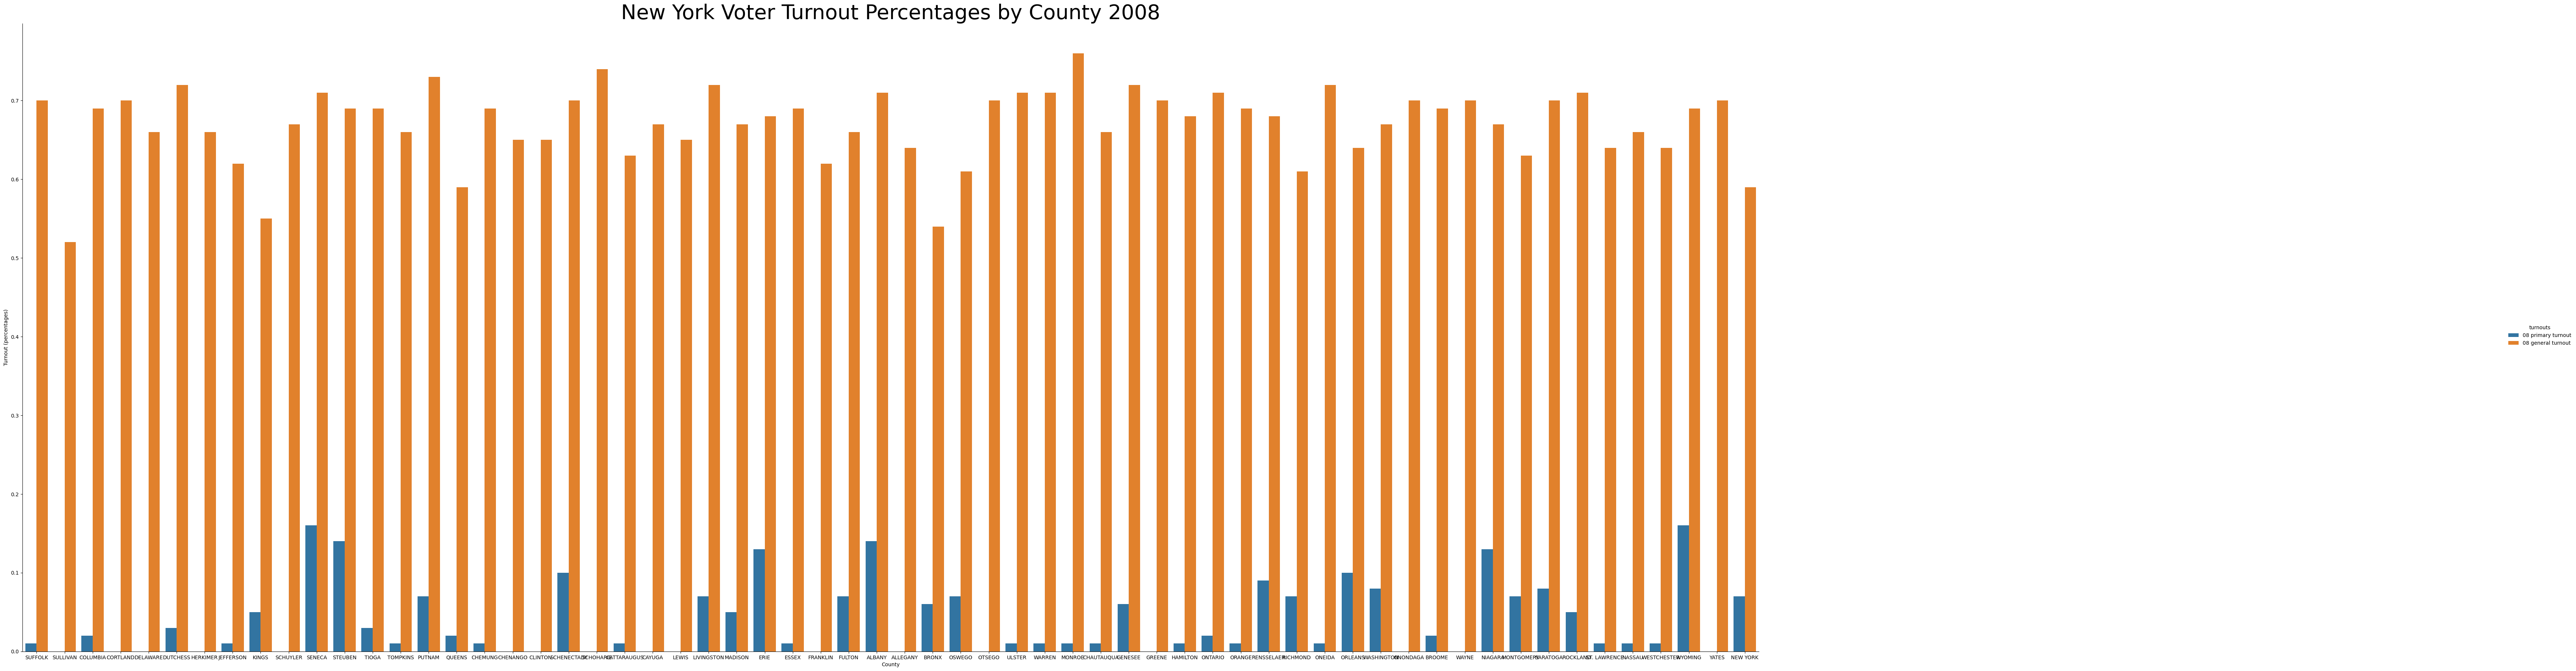

In [16]:
# New York 2008
dfs = pd.DataFrame(data={'county': df_NY_G08['County'], 
                         '08 primary turnout': df_NY_P08['ElectionReturns_P08CountyTurnoutAllRegisteredVoters'], 
                         '08 general turnout': df_NY_G08['ElectionReturns_G08CountyTurnoutAllRegisteredVoters']})

dfs1 = pd.melt(dfs, id_vars = "county")
dfs1 = dfs1.rename(columns={"variable": "turnouts"})

print(dfs1)

# side by side barplot for new york 2008 elections
barplot_NY_08 = sns.catplot(x = 'county', y='value', 
               hue = 'turnouts', data=dfs1, kind='bar')
#add overall title
plt.title('New York Voter Turnout Percentages by County 2008', fontsize=40)

#add axis titles
plt.xlabel('County')
plt.ylabel('Turnout (percentages)')

barplot_NY_08.fig.set_size_inches(80,20)

plt.show()

The first thing I notice about New York's 2008 voter turnout is that there is a huge difference between voter turnout for Primary and General elections. The turnout for the Primary elections are very very low in comparison to General elections. Is this coincidental or will other elections in New York have similar trends?

          county            turnouts  value
0        SUFFOLK  10 primary turnout   0.08
1       SULLIVAN  10 primary turnout   0.07
2       COLUMBIA  10 primary turnout   0.12
3       CORTLAND  10 primary turnout   0.08
4       DELAWARE  10 primary turnout   0.12
..           ...                 ...    ...
119       NASSAU  10 general turnout   0.42
120  WESTCHESTER  10 general turnout   0.43
121      WYOMING  10 general turnout   0.51
122        YATES  10 general turnout   0.48
123     NEW YORK  10 general turnout   0.34

[124 rows x 3 columns]


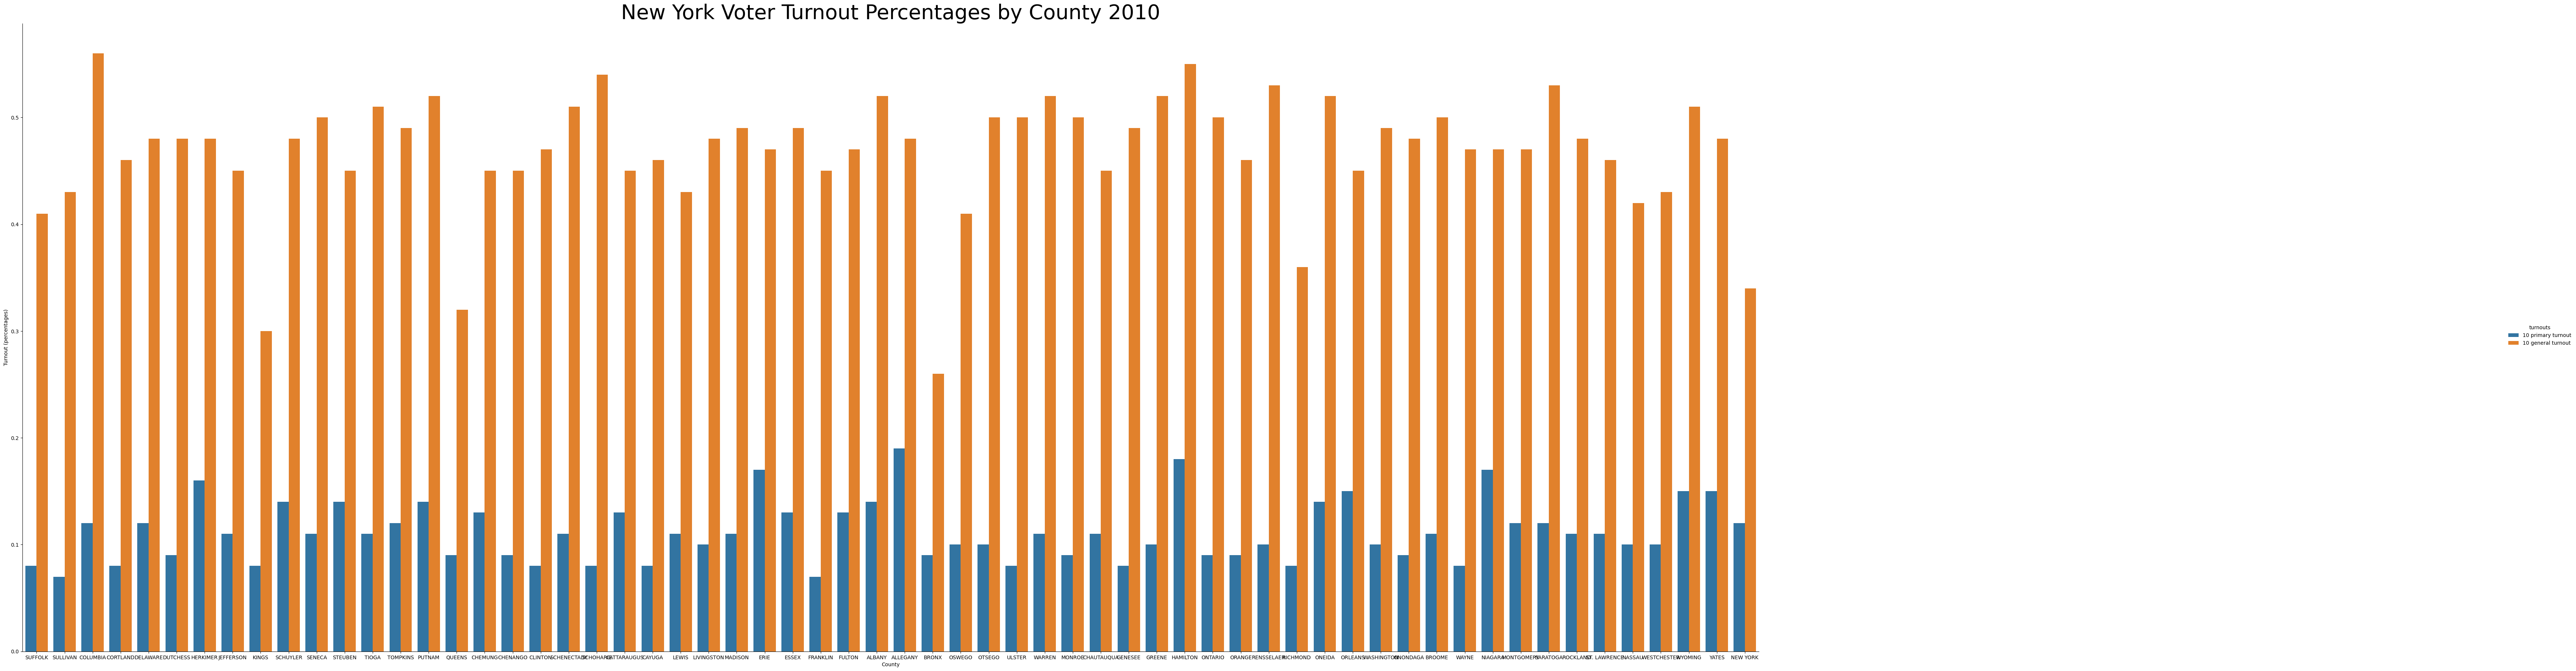

In [17]:
# New York 2010
dfs = pd.DataFrame(data={'county': df_NY_G10['County'], 
                         '10 primary turnout': df_NY_P10['ElectionReturns_P10CountyTurnoutAllRegisteredVoters'], 
                         '10 general turnout': df_NY_G10['ElectionReturns_G10CountyTurnoutAllRegisteredVoters']})

dfs1 = pd.melt(dfs, id_vars = "county")
dfs1 = dfs1.rename(columns={"variable": "turnouts"})

print(dfs1)

# side by side barplot for new york 2010 elections
barplot_NY_10 = sns.catplot(x = 'county', y='value', 
               hue = 'turnouts', data=dfs1, kind='bar')
#add overall title
plt.title('New York Voter Turnout Percentages by County 2010', fontsize=40)

#add axis titles
plt.xlabel('County')
plt.ylabel('Turnout (percentages)')

barplot_NY_10.fig.set_size_inches(80,20)

plt.show()

Looking at the 2010 election turnout shows us that the low Primary election turnout numbers in 2008 were not a coincidence. The 2010 Primary turnout has increased in proportion to General turnout since 2008, but remains low (less than half of what General turnout is). This is very different voting behavior compared to what we saw in California during the same years (where Primary turnout went up significantly in 2010 with respect to General turnout and in comparison to 2008)

Why might voters in New York place such great emphasis on voting in General elections over Primary elections? We'll investigate how this behavior might have to do with community income, education and geographical location in the next few parts.

#### But first, let's also look at California and New York voter turnout for years 2016 and 2018. How different will they be from 2008 and 2010?

In [18]:
# California voter turnout (General 16)
df_CA_G16 = CA.select(col('County'),col('ElectionReturns_G16CountyTurnoutAllRegisteredVoters')).toPandas().drop_duplicates()

In [19]:
# California voter turnout (Primary 16)
df_CA_P16 = CA.select(col('County'),col('ElectionReturns_P16CountyTurnoutAllRegisteredVoters')).toPandas().drop_duplicates()

In [20]:
# remove percent sign from voter turnout
df_CA_P16['ElectionReturns_P16CountyTurnoutAllRegisteredVoters'] = df_CA_P16['ElectionReturns_P16CountyTurnoutAllRegisteredVoters'].str.rstrip('%').astype('float') / 100.0
df_CA_G16['ElectionReturns_G16CountyTurnoutAllRegisteredVoters'] = df_CA_G16['ElectionReturns_G16CountyTurnoutAllRegisteredVoters'].str.rstrip('%').astype('float') / 100.0

          county            turnouts  value
0           LAKE  16 primary turnout   0.48
1         LASSEN  16 primary turnout   0.50
2    LOS ANGELES  16 primary turnout   0.39
3          MARIN  16 primary turnout   0.63
4       MARIPOSA  16 primary turnout   0.59
..           ...                 ...    ...
111   SACRAMENTO  16 general turnout   0.74
112  SANTA CLARA  16 general turnout   0.83
113   STANISLAUS  16 general turnout   0.73
114    SAN MATEO  16 general turnout   0.82
115   SAN BENITO  16 general turnout   0.80

[116 rows x 3 columns]


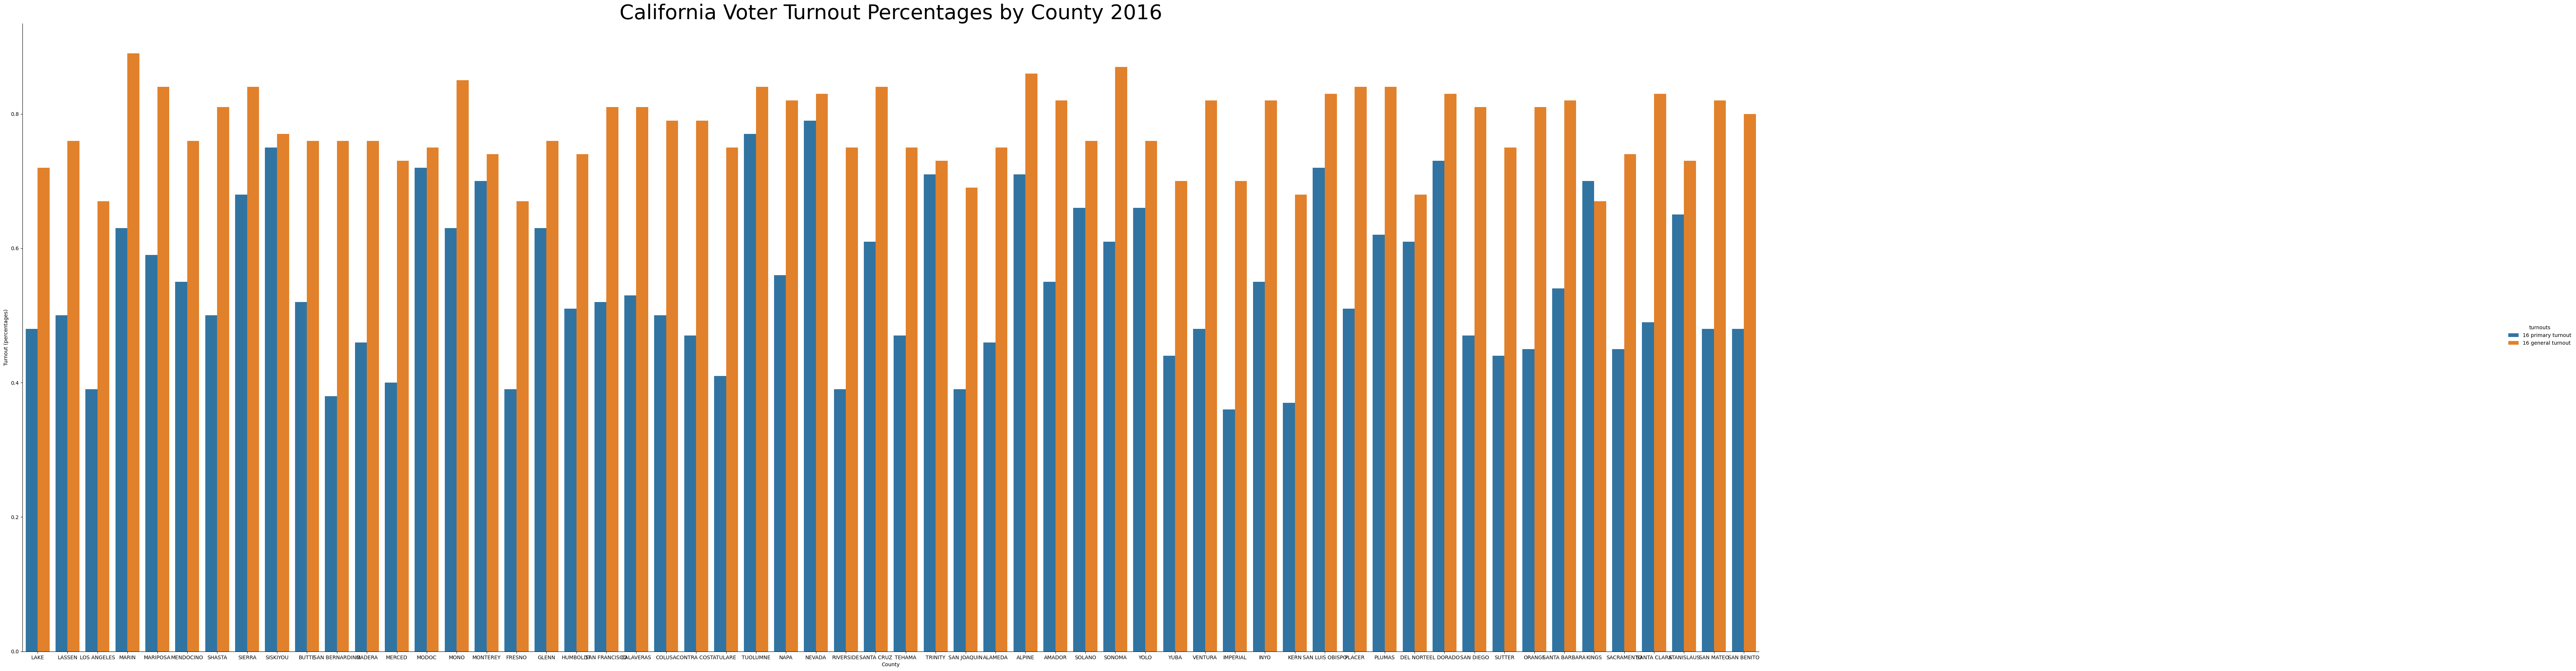

In [21]:
# California 2016
dfs = pd.DataFrame(data={'county': df_CA_G16['County'], 
                         '16 primary turnout': df_CA_P16['ElectionReturns_P16CountyTurnoutAllRegisteredVoters'], 
                         '16 general turnout': df_CA_G16['ElectionReturns_G16CountyTurnoutAllRegisteredVoters']})

dfs1 = pd.melt(dfs, id_vars = "county")
dfs1 = dfs1.rename(columns={"variable": "turnouts"})

print(dfs1)

# side by side barplot for new york 2008 elections
barplot_CA_16 = sns.catplot(x = 'county', y='value', 
               hue = 'turnouts', data=dfs1, kind='bar')
#add overall title
plt.title('California Voter Turnout Percentages by County 2016', fontsize=40)

#add axis titles
plt.xlabel('County')
plt.ylabel('Turnout (percentages)')

barplot_CA_16.fig.set_size_inches(80,20)

plt.show()

Most counties in California continue to have a higher General election turnout than Primary election turnout in 2016. However, Primary election turnout is rising quickly, you can see that some counties are beginning to have similar turnout rates for both elections. For Kings County the Primary election turnout is higher than the General election turnout! Does this mean that voter turnout in California has risen steadily over the 10 years since 2008? Let's also look at 2018 to make sure.

In [ ]:
# California voter turnout (General 18)
df_CA_G18 = CA.select(col('County'),col('ElectionReturns_G18CountyTurnoutAllRegisteredVoters')).toPandas().drop_duplicates()

In [ ]:
# California voter turnout (Primary 18)
df_CA_P18 = CA.select(col('County'),col('ElectionReturns_P18CountyTurnoutAllRegisteredVoters')).toPandas().drop_duplicates()

In [ ]:
# remove percent sign from voter turnout
df_CA_P18['ElectionReturns_P18CountyTurnoutAllRegisteredVoters'] = df_CA_P18['ElectionReturns_P18CountyTurnoutAllRegisteredVoters'].str.rstrip('%').astype('float') / 100.0
df_CA_G18['ElectionReturns_G18CountyTurnoutAllRegisteredVoters'] = df_CA_G18['ElectionReturns_G18CountyTurnoutAllRegisteredVoters'].str.rstrip('%').astype('float') / 100.0

          county            turnouts  value
0           LAKE  18 primary turnout   0.43
1         LASSEN  18 primary turnout   0.45
2    LOS ANGELES  18 primary turnout   0.28
3          MARIN  18 primary turnout   0.54
4       MARIPOSA  18 primary turnout   0.57
..           ...                 ...    ...
111   SACRAMENTO  18 general turnout   0.67
112  SANTA CLARA  18 general turnout   0.70
113   STANISLAUS  18 general turnout   0.64
114    SAN MATEO  18 general turnout   0.72
115   SAN BENITO  18 general turnout   0.68

[116 rows x 3 columns]


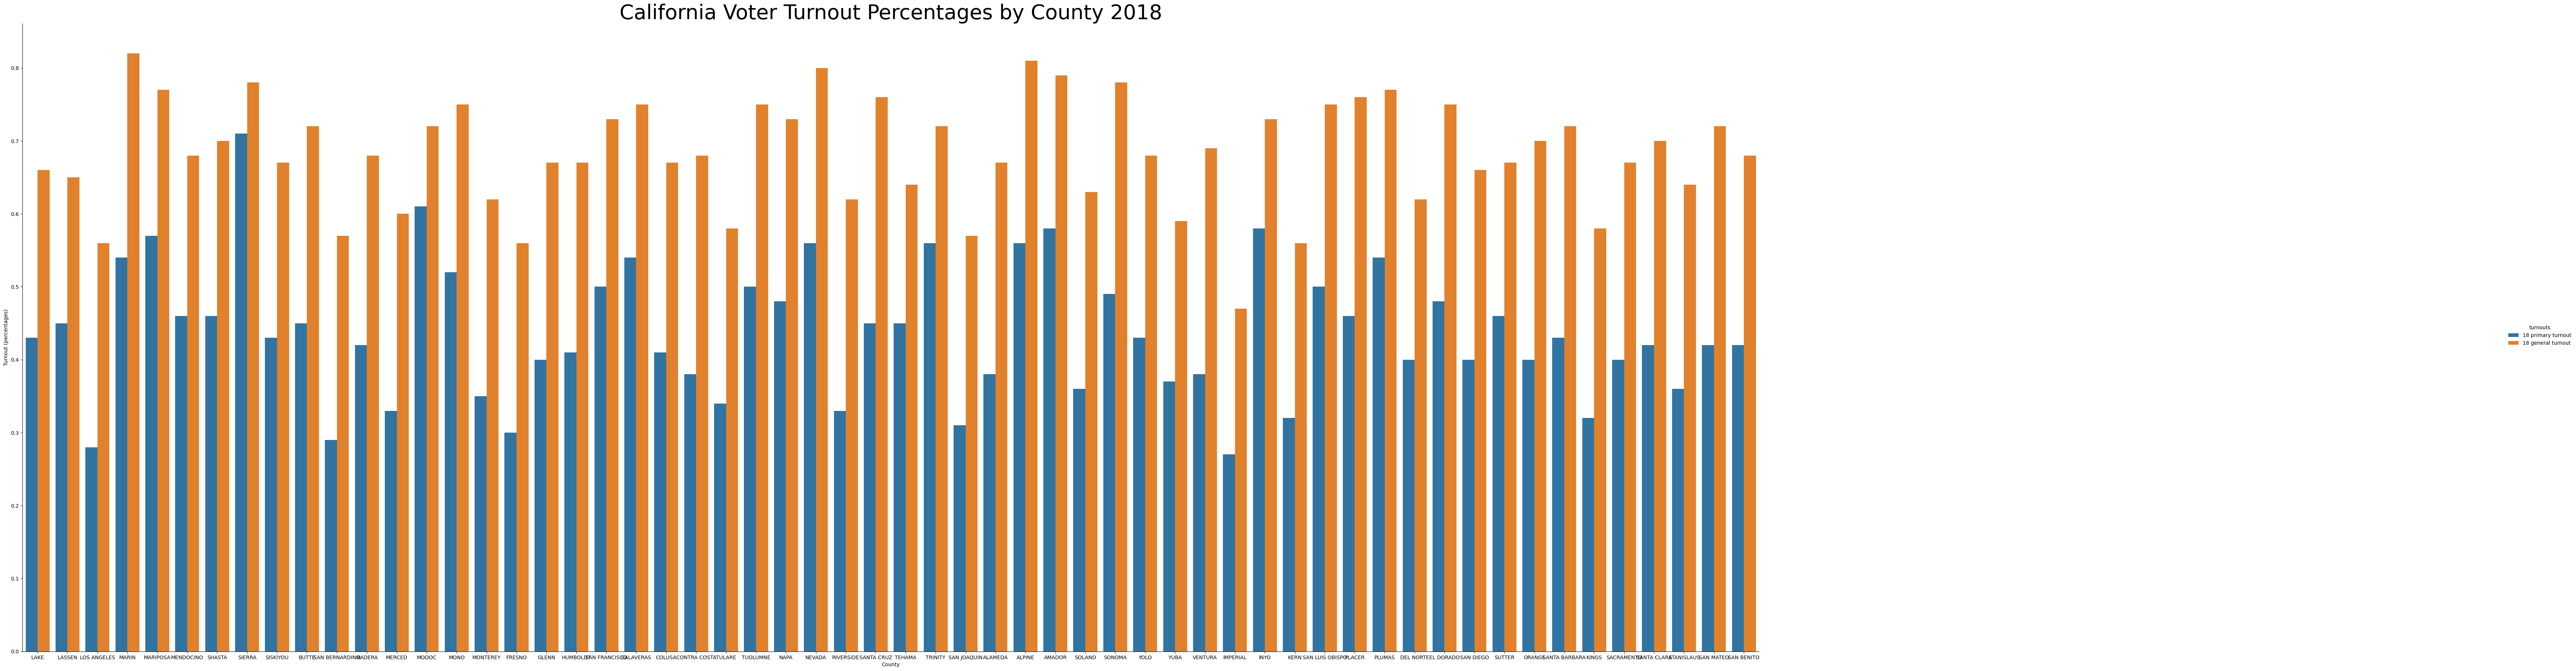

In [ ]:
# California 2018
dfs = pd.DataFrame(data={'county': df_CA_G18['County'], 
                         '18 primary turnout': df_CA_P18['ElectionReturns_P18CountyTurnoutAllRegisteredVoters'], 
                         '18 general turnout': df_CA_G18['ElectionReturns_G18CountyTurnoutAllRegisteredVoters']})

dfs1 = pd.melt(dfs, id_vars = "county")
dfs1 = dfs1.rename(columns={"variable": "turnouts"})

print(dfs1)

# side by side barplot for new york 2008 elections
barplot_CA_18 = sns.catplot(x = 'county', y='value', 
               hue = 'turnouts', data=dfs1, kind='bar')
#add overall title
plt.title('California Voter Turnout Percentages by County 2018', fontsize=40)

#add axis titles
plt.xlabel('County')
plt.ylabel('Turnout (percentages)')

barplot_CA_18.fig.set_size_inches(80,20)

plt.show()

The 2018 Primary election turnout has dropped down since the 2016 Primary turnout rates. If we look closely, we notice that the proportion of Primary turnout in comparison to General turnout remains similar to what we saw in 2010.

The peak Primary turnout we saw in 2016 may have had influence from the 2016 Presidential election. Although there are many reasons which may have caused higher turnout during the presidential election, one may be how the type or competetiveness of the election stimulates voters to express support for their favored candidate.

In [ ]:
# New York voter turnout (General 16)
df_NY_G16 = NY.select(col('County'),col('ElectionReturns_G16CountyTurnoutAllRegisteredVoters')).toPandas().drop_duplicates()

In [ ]:
# New York voter turnout (Primary 16)
df_NY_P16 = NY.select(col('County'),col('ElectionReturns_P16CountyTurnoutAllRegisteredVoters')).toPandas().drop_duplicates()

In [ ]:
# remove percent sign from voter turnout
df_NY_P16['ElectionReturns_P16CountyTurnoutAllRegisteredVoters'] = df_NY_P16['ElectionReturns_P16CountyTurnoutAllRegisteredVoters'].str.rstrip('%').astype('float') / 100.0
df_NY_G16['ElectionReturns_G16CountyTurnoutAllRegisteredVoters'] = df_NY_G16['ElectionReturns_G16CountyTurnoutAllRegisteredVoters'].str.rstrip('%').astype('float') / 100.0

          county            turnouts  value
0        SUFFOLK  16 primary turnout   0.03
1       SULLIVAN  16 primary turnout   0.06
2       COLUMBIA  16 primary turnout   0.12
3       CORTLAND  16 primary turnout   0.04
4       DELAWARE  16 primary turnout   0.09
..           ...                 ...    ...
119       NASSAU  16 general turnout   0.63
120  WESTCHESTER  16 general turnout   0.65
121      WYOMING  16 general turnout   0.68
122        YATES  16 general turnout   0.70
123     NEW YORK  16 general turnout   0.60

[124 rows x 3 columns]


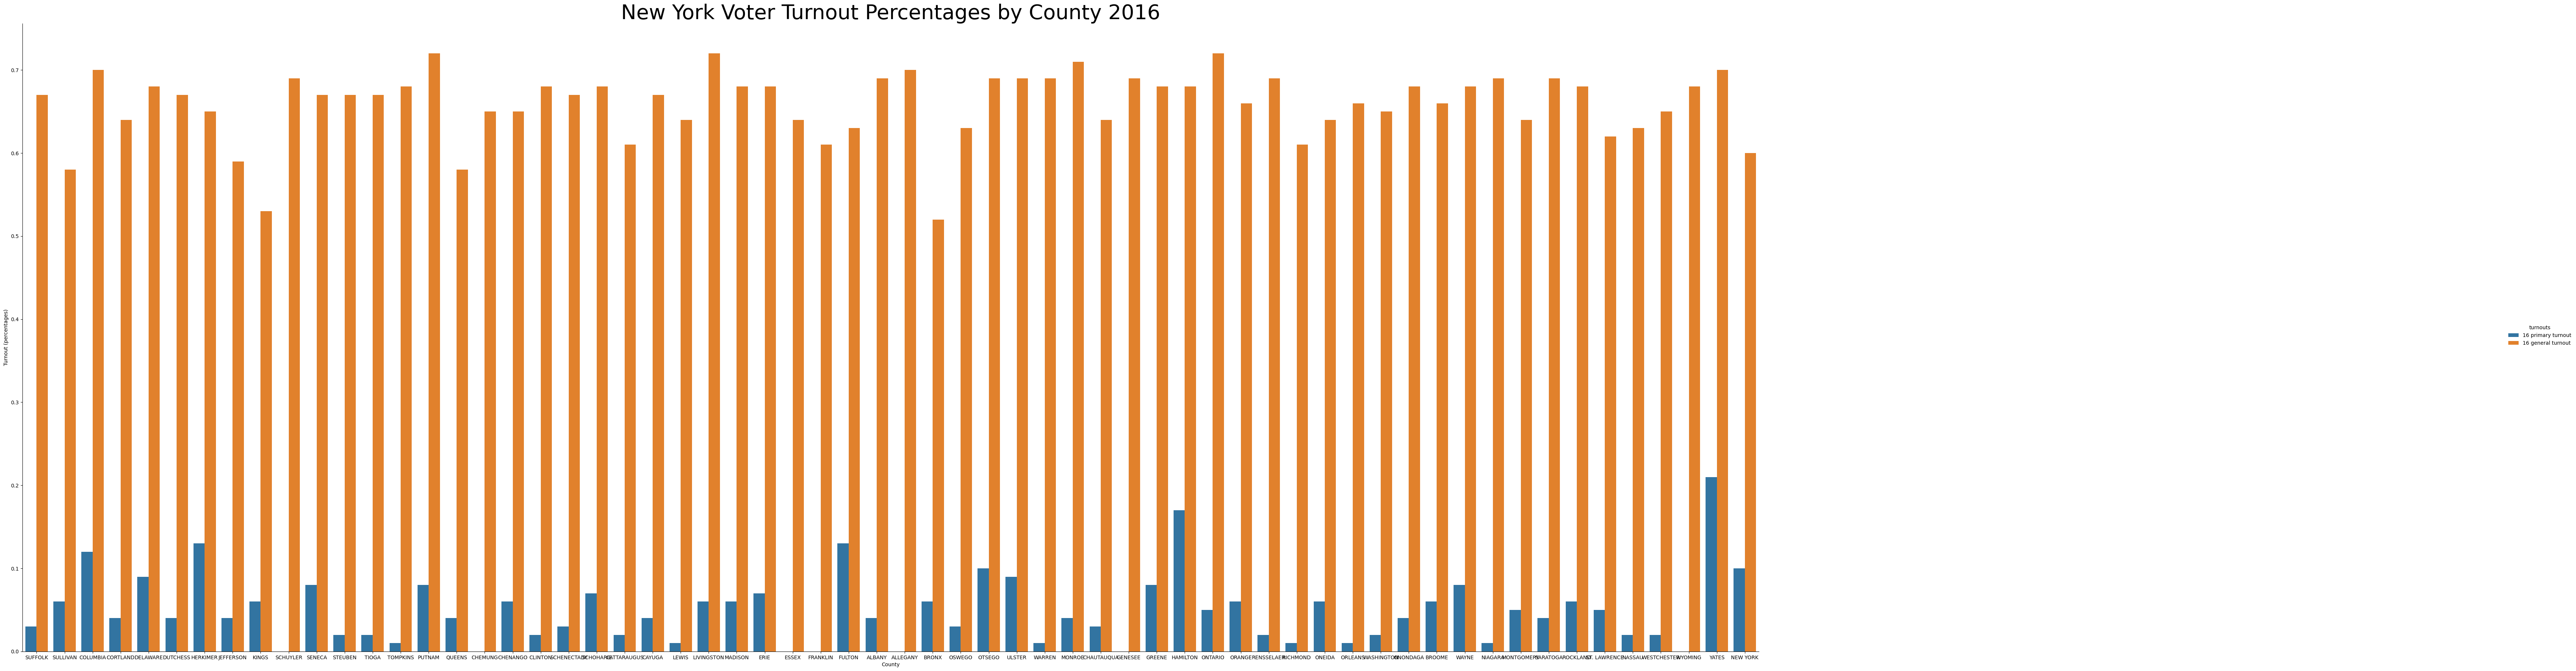

In [ ]:
# New York 2016
dfs = pd.DataFrame(data={'county': df_NY_G16['County'], 
                         '16 primary turnout': df_NY_P16['ElectionReturns_P16CountyTurnoutAllRegisteredVoters'], 
                         '16 general turnout': df_NY_G16['ElectionReturns_G16CountyTurnoutAllRegisteredVoters']})

dfs1 = pd.melt(dfs, id_vars = "county")
dfs1 = dfs1.rename(columns={"variable": "turnouts"})

print(dfs1)

# side by side barplot for new york 2008 elections
barplot_NY_16 = sns.catplot(x = 'county', y='value', 
               hue = 'turnouts', data=dfs1, kind='bar')
#add overall title
plt.title('New York Voter Turnout Percentages by County 2016', fontsize=40)

#add axis titles
plt.xlabel('County')
plt.ylabel('Turnout (percentages)')

barplot_NY_16.fig.set_size_inches(80,20)

plt.show()

New York consistently has much lower Primary turnout than General turnout, even during 2016 in which rates may have been inflated by the Presidential election.

In [ ]:
# New York voter turnout (General 18)
df_NY_G18 = NY.select(col('County'),col('ElectionReturns_G18CountyTurnoutAllRegisteredVoters')).toPandas().drop_duplicates()

In [ ]:
# New York voter turnout (Primary 18)
df_NY_P18 = NY.select(col('County'),col('ElectionReturns_P18CountyTurnoutAllRegisteredVoters')).toPandas().drop_duplicates()

In [ ]:
# remove percent sign from voter turnout
df_NY_P18['ElectionReturns_P18CountyTurnoutAllRegisteredVoters'] = df_NY_P18['ElectionReturns_P18CountyTurnoutAllRegisteredVoters'].str.rstrip('%').astype('float') / 100.0
df_NY_G18['ElectionReturns_G18CountyTurnoutAllRegisteredVoters'] = df_NY_G18['ElectionReturns_G18CountyTurnoutAllRegisteredVoters'].str.rstrip('%').astype('float') / 100.0

          county            turnouts  value
0        SUFFOLK  18 primary turnout   0.09
1       SULLIVAN  18 primary turnout   0.11
2       COLUMBIA  18 primary turnout   0.18
3       CORTLAND  18 primary turnout   0.04
4       DELAWARE  18 primary turnout   0.15
..           ...                 ...    ...
119       NASSAU  18 general turnout   0.53
120  WESTCHESTER  18 general turnout   0.58
121      WYOMING  18 general turnout   0.58
122        YATES  18 general turnout   0.62
123     NEW YORK  18 general turnout   0.50

[124 rows x 3 columns]


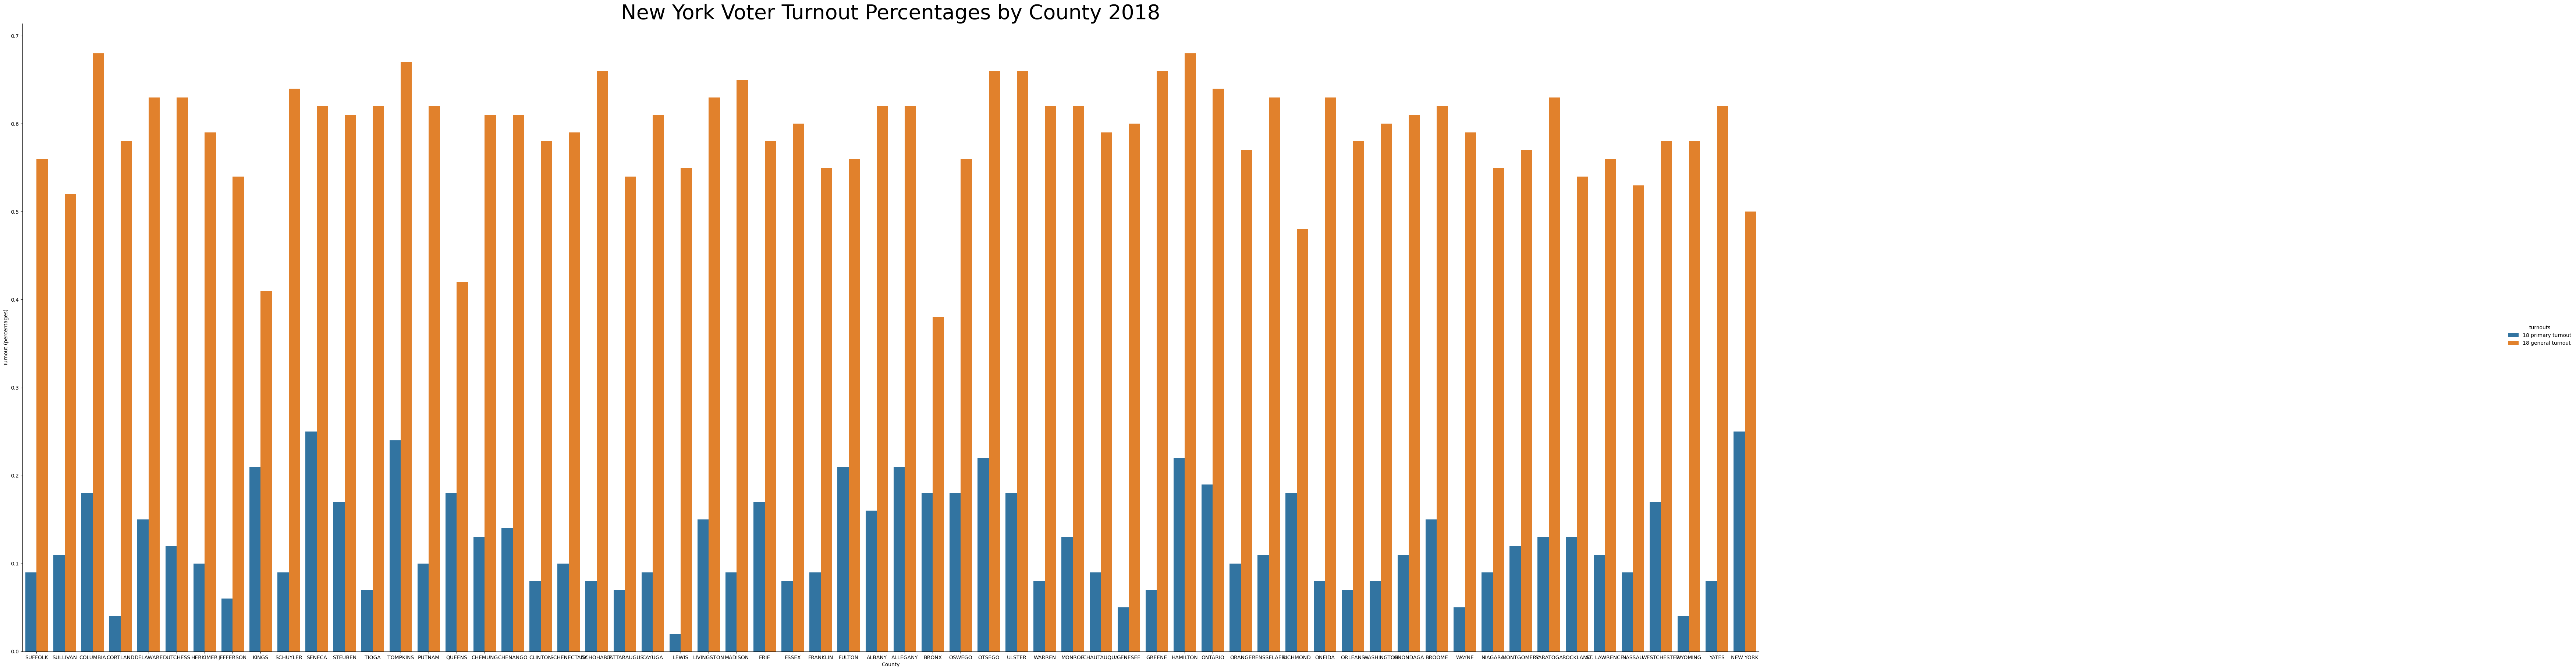

In [ ]:
# New York 2018
dfs = pd.DataFrame(data={'county': df_NY_G18['County'], 
                         '18 primary turnout': df_NY_P18['ElectionReturns_P18CountyTurnoutAllRegisteredVoters'], 
                         '18 general turnout': df_NY_G18['ElectionReturns_G18CountyTurnoutAllRegisteredVoters']})

dfs1 = pd.melt(dfs, id_vars = "county")
dfs1 = dfs1.rename(columns={"variable": "turnouts"})

print(dfs1)

# side by side barplot for new york 2008 elections
barplot_NY_18 = sns.catplot(x = 'county', y='value', 
               hue = 'turnouts', data=dfs1, kind='bar')
#add overall title
plt.title('New York Voter Turnout Percentages by County 2018', fontsize=40)

#add axis titles
plt.xlabel('County')
plt.ylabel('Turnout (percentages)')

barplot_NY_18.fig.set_size_inches(80,20)

plt.show()

The 2018 New York Primary elections had greater turnout than the 2016 Primary elections, which is counterintuitive to what we expected based on the trend in California. A search online shows that there are many articles dedicated to analyzing New York's consistent low Primary turnout.

- https://www.politifact.com/factchecks/2018/feb/01/andrea-stewart-cousins/new-york-consistently-ranks-low-voter-turnout/
- https://www.ny1.com/nyc/all-boroughs/politics/2017/09/12/primary-day-nyc-low-voter-turnout-quiet-polling-sites
- https://spectrumlocalnews.com/nys/central-ny/ny-state-of-politics/2022/08/25/analysis-shows-low-turnout-in-new-york-s-primary-

The last article suggests one reason for this behavior: "Turnout can be affected by a variety of factors. Not every area of the state had a primary or a competitive election on Tuesday. The state (NY) also split its primaries, with campaigns for the gubernatorial and state Assembly nominations happening in June and the state Senate and U.S. House races moving to August after New York's top court tossed redistricting maps and new ones were drawn."

## Question 2 : How might party preference, income, housing value, or education affect voter turnout in the 2016 Presidential Election?

#### Arizona

In [24]:
df_az = AZ.select("Parties_Description","CommercialData_AreaMedianEducationYears",\
                  "CommercialData_EstimatedAreaMedianHHIncome","CommercialData_AreaMedianHousingValue", 'County',\
                  'ElectionReturns_G16CountyTurnoutAllRegisteredVoters','ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters')
df_az.show(5)


+-------------------+---------------------------------------+------------------------------------------+-------------------------------------+------+---------------------------------------------------+-----------------------------------------------------+
|Parties_Description|CommercialData_AreaMedianEducationYears|CommercialData_EstimatedAreaMedianHHIncome|CommercialData_AreaMedianHousingValue|County|ElectionReturns_G16CountyTurnoutAllRegisteredVoters|ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters|
+-------------------+---------------------------------------+------------------------------------------+-------------------------------------+------+---------------------------------------------------+-----------------------------------------------------+
|         Democratic|                                   null|                                      null|                                 null|NAVAJO|                                                59%|                               

Let's check out how many missing values are in each column.

In [25]:
[(c, df_az.where(col(c).isNull()).count()) for c in df_az.columns]

[('Parties_Description', 0),
 ('CommercialData_AreaMedianEducationYears', 264576),
 ('CommercialData_EstimatedAreaMedianHHIncome', 264576),
 ('CommercialData_AreaMedianHousingValue', 264946),
 ('County', 0),
 ('ElectionReturns_G16CountyTurnoutAllRegisteredVoters', 0),
 ('ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters', 8538)]

There are a plenty of them. For the sake of convenience, we will turn them into 0 for further calculation(in pandas dataframe chunk below).

Since we are focusing on the voter turnout in elections, let's see how the voters' political parties distribute.

In [26]:
df_az.groupby('Parties_Description').count().show()

+--------------------+-------+
| Parties_Description|  count|
+--------------------+-------+
|                 Tea|     32|
|          Republican|1491584|
|         Progressive|     18|
|          Federalist|      7|
|Registered Indepe...| 202091|
|             Liberal|    739|
|American Independent|     14|
|          Bull Moose|      8|
|               Other|  49753|
|         Libertarian|  37902|
|               Labor|      3|
|           Christian|      4|
|                Whig|      7|
|               Green|   4453|
|         Natural Law|     59|
|              Reform|     11|
|             Freedom|      6|
|           Anarchist|      8|
|      Constitutional|     33|
|        Conservative|    236|
+--------------------+-------+
only showing top 20 rows



Next, we want to find out whether education years could predict voter turnout in some sense. Let's define 70% is a good percent of county voter turnout and see if the higher average education in years lead to good turnout.

In [27]:
df = df_az.toPandas()

In [28]:
df = df.fillna(0)

In [29]:
df['ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters'] = pd.to_numeric(df['ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters']\
                                                                            .replace({'\%':''}, regex = True))
df['ElectionReturns_G16CountyTurnoutAllRegisteredVoters'] = pd.to_numeric(df['ElectionReturns_G16CountyTurnoutAllRegisteredVoters']\
                                                                 .replace({'\%':''}, regex = True))

df["CommercialData_AreaMedianEducationYears"] = pd.to_numeric(df["CommercialData_AreaMedianEducationYears"])

df['CommercialData_EstimatedAreaMedianHHIncome'] = pd.to_numeric(df['CommercialData_EstimatedAreaMedianHHIncome']\
                                                                 .replace({'\$':''}, regex = True))
df['CommercialData_AreaMedianHousingValue'] = pd.to_numeric(df['CommercialData_AreaMedianHousingValue']\
                                                                 .replace({'\$':''}, regex = True))

Let's first check out the distribution of voter turnouts for parties as a whole

In [10]:
df_plt = df.groupby('Parties_Description')['ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters'].mean()

<AxesSubplot:title={'center':'Parties'}, xlabel='Parties', ylabel='Voter_Turnout'>

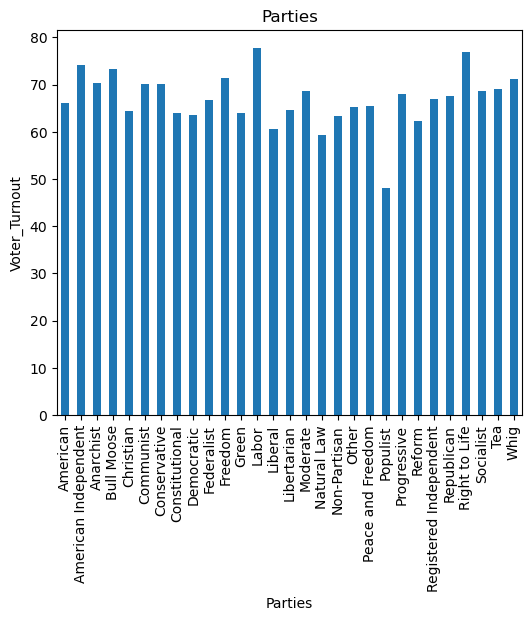

In [11]:
df_plt.plot(kind='bar', title='Parties_turnout', ylabel='Voter_Turnout',xlabel='Parties', figsize=(6, 5))

###### We could see that there is no significant differences among all parties except for Populist. One possible explaination might be the small sample size of the Populist party.

In [30]:
### County Level

In [31]:
df[df.ElectionReturns_G16CountyTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({"CommercialData_AreaMedianEducationYears":['mean']}).mean()

CommercialData_AreaMedianEducationYears  mean    11.17002
dtype: float64

In [32]:
df[df.ElectionReturns_G16CountyTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({"CommercialData_AreaMedianEducationYears":['mean']}).mean()

CommercialData_AreaMedianEducationYears  mean    9.140244
dtype: float64

In [33]:
### District Level

In [34]:
df[df.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({"CommercialData_AreaMedianEducationYears":['mean']}).mean()

CommercialData_AreaMedianEducationYears  mean    9.175577
dtype: float64

In [35]:
df[df.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({"CommercialData_AreaMedianEducationYears":['mean']}).mean()

CommercialData_AreaMedianEducationYears  mean    8.897462
dtype: float64

Apparently, voters in good voter turnout counties have higher average education in years than those in bad voter turnout counties in both cases.

Although there are differences between county voter turnout and district voter turnout, registered voters with higher education in years tend to participate more in the election voting processes. Things are getting a little exciting. Let's see how it works for income and housing value.

In [36]:
### County level

In [37]:
df[df.ElectionReturns_G16CountyTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({'CommercialData_EstimatedAreaMedianHHIncome':['mean']}).mean()

CommercialData_EstimatedAreaMedianHHIncome  mean    58160.523855
dtype: float64

In [42]:
df[df.ElectionReturns_G16CountyTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({'CommercialData_EstimatedAreaMedianHHIncome':['mean']}).mean()

CommercialData_EstimatedAreaMedianHHIncome  mean    57176.72705
dtype: float64

In [76]:
### District level

In [71]:
df[df.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({'CommercialData_EstimatedAreaMedianHHIncome':['mean']}).mean()

CommercialData_EstimatedAreaMedianHHIncome  mean    54057.287839
dtype: float64

In [72]:
df[df.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({'CommercialData_EstimatedAreaMedianHHIncome':['mean']}).mean()

CommercialData_EstimatedAreaMedianHHIncome  mean    39305.31937
dtype: float64

With the mean income calculated and education in years, it is interesting to see that in good voter turnout areas registered voters tend to have higher income than those in bad voter turnout areas. Next, we will see the means for housing values.

In [74]:
### County level

In [80]:
df[df.ElectionReturns_G16CountyTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({'CommercialData_AreaMedianHousingValue':['mean']}).mean()

CommercialData_AreaMedianHousingValue  mean    185418.498002
dtype: float64

In [81]:
df[df.ElectionReturns_G16CountyTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({'CommercialData_AreaMedianHousingValue':['mean']}).mean()

CommercialData_AreaMedianHousingValue  mean    115147.089953
dtype: float64

In [82]:
### District level

In [83]:
df[df.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({'CommercialData_AreaMedianHousingValue':['mean']}).mean()

CommercialData_AreaMedianHousingValue  mean    171691.741181
dtype: float64

In [84]:
df[df.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({'CommercialData_AreaMedianHousingValue':['mean']}).mean()

CommercialData_AreaMedianHousingValue  mean    113395.770531
dtype: float64

Voters with higher housing value tend to participate more. Overall, registered voters will more likely to vote because of longer education in years, higher income level, and higher housing values. Let's see if that pattern follows for other states.

#### California

In [5]:
df_ca = CA.select("Parties_Description","CommercialData_AreaMedianEducationYears",\
                  "CommercialData_EstimatedAreaMedianHHIncome","CommercialData_AreaMedianHousingValue", 'County',\
                  'ElectionReturns_G16CountyTurnoutAllRegisteredVoters','ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters')
df_ca.show(5)


+-------------------+---------------------------------------+------------------------------------------+-------------------------------------+------+---------------------------------------------------+-----------------------------------------------------+
|Parties_Description|CommercialData_AreaMedianEducationYears|CommercialData_EstimatedAreaMedianHHIncome|CommercialData_AreaMedianHousingValue|County|ElectionReturns_G16CountyTurnoutAllRegisteredVoters|ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters|
+-------------------+---------------------------------------+------------------------------------------+-------------------------------------+------+---------------------------------------------------+-----------------------------------------------------+
|         Republican|                                     12|                                    $57357|                              $190340|  LAKE|                                                72%|                               

In [21]:
[(c, df_ca.where(col(c).isNull()).count()) for c in df_ca.columns]

[('Parties_Description', 0),
 ('CommercialData_AreaMedianEducationYears', 680307),
 ('CommercialData_EstimatedAreaMedianHHIncome', 680307),
 ('CommercialData_AreaMedianHousingValue', 684598),
 ('ElectionReturns_G16_Cnty_Percent_Trump_R', 0),
 ('ElectionReturns_G16_Cnty_Percent_Clinton_D', 0),
 ('County', 0),
 ('ElectionReturns_G16PrecinctTurnoutDemocrats', 13200),
 ('ElectionReturns_G16PrecinctTurnoutRepublicans', 13200)]

Here we can see that there are still substantial amount of values missing, so we will try to turn them into 0 later.

Let's look through the distribution of parties in California.

In [22]:
df_ca.groupby('Parties_Description').count().show()

+--------------------+--------+
| Parties_Description|   count|
+--------------------+--------+
|          Republican| 5242229|
|             Unknown|  119856|
|American Independent|  683283|
|               Other|  111988|
|         Libertarian|  203924|
|               Green|   84968|
|         Natural Law|    3694|
|              Reform|    4772|
|   Peace and Freedom|  105632|
|          Democratic|10096846|
|        Non-Partisan| 5122326|
+--------------------+--------+



In [6]:
df2 = df_ca.toPandas()

In [7]:
df2.fillna(0)

,Parties_Description,CommercialData_AreaMedianEducationYears,CommercialData_EstimatedAreaMedianHHIncome,CommercialData_AreaMedianHousingValue,County,ElectionReturns_G16CountyTurnoutAllRegisteredVoters,ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters
0,Republican,12,$57357,$190340,LAKE,72%,70%
1,Republican,0,0,0,LAKE,72%,70%
2,Non-Partisan,12,$57357,$190340,LAKE,72%,70%
3,Peace and Freedom,12,$57357,$190340,LAKE,72%,70%
4,Democratic,0,0,0,LAKE,72%,70%
...,...,...,...,...,...,...,...
21779513,Democratic,12,$95963,$266388,YUBA,70%,76%
21779514,Non-Partisan,12,$95963,$266388,YUBA,70%,76%
21779515,Republican,12,$95963,$266388,YUBA,70%,76%
21779516,Republican,12,$95963,$266388,YUBA,70%,76%


In [8]:
df2['ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters'] = pd.to_numeric(df2['ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters']\
                                                                            .replace({'\%':''}, regex = True))
df2['ElectionReturns_G16CountyTurnoutAllRegisteredVoters'] = pd.to_numeric(df2['ElectionReturns_G16CountyTurnoutAllRegisteredVoters']\
                                                                 .replace({'\%':''}, regex = True))

df2["CommercialData_AreaMedianEducationYears"] = pd.to_numeric(df2["CommercialData_AreaMedianEducationYears"])

df2['CommercialData_EstimatedAreaMedianHHIncome'] = pd.to_numeric(df2['CommercialData_EstimatedAreaMedianHHIncome']\
                                                                 .replace({'\$':''}, regex = True))
df2['CommercialData_AreaMedianHousingValue'] = pd.to_numeric(df2['CommercialData_AreaMedianHousingValue']\
                                                                 .replace({'\$':''}, regex = True))

Let's first run the distribution of voter turnout for parties again.

In [16]:
df2_plt = df2.groupby('Parties_Description')['ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters'].mean()

<AxesSubplot:title={'center':'Parties'}, xlabel='Parties', ylabel='Voter_Turnout'>

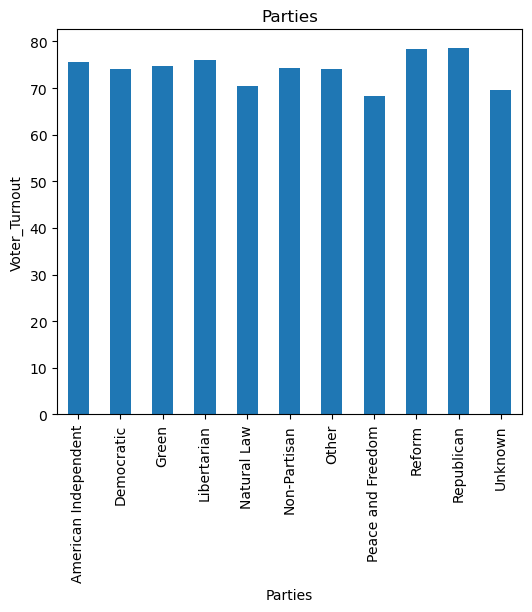

In [17]:
df2_plt.plot(kind='bar', title='Parties_turnout', ylabel='Voter_Turnout',xlabel='Parties', figsize=(6, 5))

##### That is a pretty even distribution of voter turnout as well.

##### Education

In [ ]:
### County Level

In [55]:
df2[df2.ElectionReturns_G16CountyTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({"CommercialData_AreaMedianEducationYears":['mean']}).mean()

CommercialData_AreaMedianEducationYears  mean    12.598459
dtype: float64

In [56]:
df2[df2.ElectionReturns_G16CountyTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({"CommercialData_AreaMedianEducationYears":['mean']}).mean()

CommercialData_AreaMedianEducationYears  mean    12.141745
dtype: float64

In [57]:
### District Level

In [58]:
df2[df2.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({"CommercialData_AreaMedianEducationYears":['mean']}).mean()

CommercialData_AreaMedianEducationYears  mean    12.755081
dtype: float64

In [59]:
df2[df2.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({"CommercialData_AreaMedianEducationYears":['mean']}).mean()

CommercialData_AreaMedianEducationYears  mean    11.980773
dtype: float64

##### Income

In [60]:
### County level

In [61]:
df2[df2.ElectionReturns_G16CountyTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({'CommercialData_EstimatedAreaMedianHHIncome':['mean']}).mean()

CommercialData_EstimatedAreaMedianHHIncome  mean    89243.269418
dtype: float64

In [62]:
df2[df2.ElectionReturns_G16CountyTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({'CommercialData_EstimatedAreaMedianHHIncome':['mean']}).mean()

CommercialData_EstimatedAreaMedianHHIncome  mean    74267.469791
dtype: float64

In [63]:
### District level

In [64]:
df2[df2.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({'CommercialData_EstimatedAreaMedianHHIncome':['mean']}).mean()

CommercialData_EstimatedAreaMedianHHIncome  mean    95217.265985
dtype: float64

In [65]:
df2[df2.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({'CommercialData_EstimatedAreaMedianHHIncome':['mean']}).mean()

CommercialData_EstimatedAreaMedianHHIncome  mean    65727.9159
dtype: float64

##### Housing value

In [66]:
### County level

In [67]:
df2[df2.ElectionReturns_G16CountyTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({'CommercialData_AreaMedianHousingValue':['mean']}).mean()

CommercialData_AreaMedianHousingValue  mean    417551.059349
dtype: float64

In [68]:
df2[df2.ElectionReturns_G16CountyTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({'CommercialData_AreaMedianHousingValue':['mean']}).mean()

CommercialData_AreaMedianHousingValue  mean    300679.651324
dtype: float64

In [69]:
### District level

In [70]:
df2[df2.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({'CommercialData_AreaMedianHousingValue':['mean']}).mean()

CommercialData_AreaMedianHousingValue  mean    433146.18647
dtype: float64

In [71]:
df2[df2.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({'CommercialData_AreaMedianHousingValue':['mean']}).mean()

CommercialData_AreaMedianHousingValue  mean    315840.669105
dtype: float64

We are not going to be surprised anymore about the consistence in the pattern that longer education in years, higher income level, and higher housing values lead people to participate more in the voting process. It should be the case for other four states, so we will skip some narrative and focus on the statistics calculated to find any emergence of rule-breaker.

#### Texas

In [72]:
df_tx = TX.select("Parties_Description","CommercialData_AreaMedianEducationYears",\
                  "CommercialData_EstimatedAreaMedianHHIncome","CommercialData_AreaMedianHousingValue", 'County',\
                  'ElectionReturns_G16CountyTurnoutAllRegisteredVoters','ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters')

In [73]:
df3 = df_tx.toPandas()

In [74]:
df3.fillna(0)

,Parties_Description,CommercialData_AreaMedianEducationYears,CommercialData_EstimatedAreaMedianHHIncome,CommercialData_AreaMedianHousingValue,County,ElectionReturns_G16CountyTurnoutAllRegisteredVoters,ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters
0,Democratic,13,$99037,$214582,ERATH,65%,68%
1,Democratic,13,$99037,$214582,ERATH,65%,68%
2,Non-Partisan,13,$99037,$214582,ERATH,65%,68%
3,Republican,13,$99037,$214582,ERATH,65%,68%
4,Republican,13,$99037,$214582,ERATH,65%,68%
...,...,...,...,...,...,...,...
15983107,Democratic,11,$74249,$55971,ZAVALA,39%,37%
15983108,Democratic,11,$74249,$55971,ZAVALA,39%,37%
15983109,Democratic,11,$74249,$55971,ZAVALA,39%,37%
15983110,Democratic,11,$74249,$55971,ZAVALA,39%,37%


In [75]:
df3['ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters'] = pd.to_numeric(df3['ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters']\
                                                                            .replace({'\%':''}, regex = True))
df3['ElectionReturns_G16CountyTurnoutAllRegisteredVoters'] = pd.to_numeric(df3['ElectionReturns_G16CountyTurnoutAllRegisteredVoters']\
                                                                 .replace({'\%':''}, regex = True))

df3["CommercialData_AreaMedianEducationYears"] = pd.to_numeric(df3["CommercialData_AreaMedianEducationYears"])

df3['CommercialData_EstimatedAreaMedianHHIncome'] = pd.to_numeric(df3['CommercialData_EstimatedAreaMedianHHIncome']\
                                                                 .replace({'\$':''}, regex = True))
df3['CommercialData_AreaMedianHousingValue'] = pd.to_numeric(df3['CommercialData_AreaMedianHousingValue']\
                                                                 .replace({'\$':''}, regex = True))

##### Checking distribution of voter turnout for all parties

In [23]:
df3_plt = df3.groupby('Parties_Description')['ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters'].mean()

<AxesSubplot:title={'center':'Parties'}, xlabel='Parties', ylabel='Voter_Turnout'>

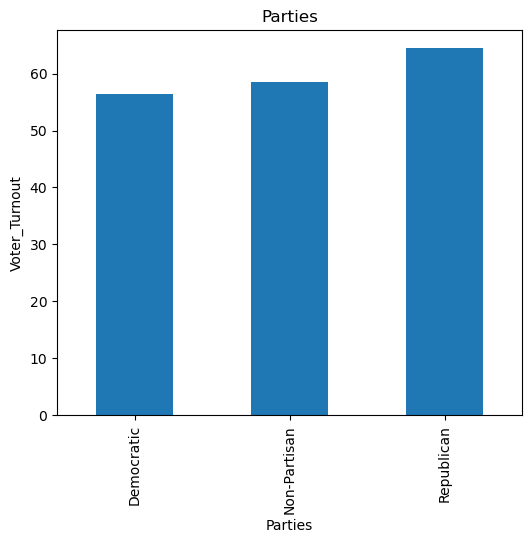

In [24]:
df3_plt.plot(kind='bar', title='Parties', ylabel='Voter_Turnout',xlabel='Parties', figsize=(6, 5))

##### Once again, we have an even distribution for the parties.

##### Education

In [76]:
### County Level

In [77]:
df3[df3.ElectionReturns_G16CountyTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({"CommercialData_AreaMedianEducationYears":['mean']}).mean()

CommercialData_AreaMedianEducationYears  mean    12.284514
dtype: float64

In [78]:
df3[df3.ElectionReturns_G16CountyTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({"CommercialData_AreaMedianEducationYears":['mean']}).mean()

CommercialData_AreaMedianEducationYears  mean    12.017423
dtype: float64

In [79]:
### District Level

In [80]:
df3[df3.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({"CommercialData_AreaMedianEducationYears":['mean']}).mean()

CommercialData_AreaMedianEducationYears  mean    12.359083
dtype: float64

In [81]:
df3[df3.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({"CommercialData_AreaMedianEducationYears":['mean']}).mean()

CommercialData_AreaMedianEducationYears  mean    11.986242
dtype: float64

##### Income

In [82]:
### County level

In [83]:
df3[df3.ElectionReturns_G16CountyTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({'CommercialData_EstimatedAreaMedianHHIncome':['mean']}).mean()

CommercialData_EstimatedAreaMedianHHIncome  mean    74497.886367
dtype: float64

In [84]:
df3[df3.ElectionReturns_G16CountyTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({'CommercialData_EstimatedAreaMedianHHIncome':['mean']}).mean()

CommercialData_EstimatedAreaMedianHHIncome  mean    65694.818689
dtype: float64

In [85]:
### District level

In [86]:
df3[df3.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({'CommercialData_EstimatedAreaMedianHHIncome':['mean']}).mean()

CommercialData_EstimatedAreaMedianHHIncome  mean    80318.638946
dtype: float64

In [87]:
df3[df3.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({'CommercialData_EstimatedAreaMedianHHIncome':['mean']}).mean()

CommercialData_EstimatedAreaMedianHHIncome  mean    64171.167236
dtype: float64

##### Housing value

In [88]:
### County level

In [89]:
df3[df3.ElectionReturns_G16CountyTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({'CommercialData_AreaMedianHousingValue':['mean']}).mean()

CommercialData_AreaMedianHousingValue  mean    145248.055594
dtype: float64

In [90]:
df3[df3.ElectionReturns_G16CountyTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({'CommercialData_AreaMedianHousingValue':['mean']}).mean()

CommercialData_AreaMedianHousingValue  mean    125140.768982
dtype: float64

In [91]:
### District level

In [92]:
df3[df3.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({'CommercialData_AreaMedianHousingValue':['mean']}).mean()

CommercialData_AreaMedianHousingValue  mean    167044.7174
dtype: float64

In [93]:
df3[df3.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({'CommercialData_AreaMedianHousingValue':['mean']}).mean()

CommercialData_AreaMedianHousingValue  mean    121602.679141
dtype: float64

The rule continues to predominate in both red states and blue states. Let's see one more red state so that we can jump to our conclusion.

#### Florida

In [94]:
df_fl = FL.select("Parties_Description","CommercialData_AreaMedianEducationYears",\
                  "CommercialData_EstimatedAreaMedianHHIncome","CommercialData_AreaMedianHousingValue", 'County',\
                  'ElectionReturns_G16CountyTurnoutAllRegisteredVoters','ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters')

In [95]:
df4 = df_fl.toPandas()

In [96]:
df4.fillna(0)

,Parties_Description,CommercialData_AreaMedianEducationYears,CommercialData_EstimatedAreaMedianHHIncome,CommercialData_AreaMedianHousingValue,County,ElectionReturns_G16CountyTurnoutAllRegisteredVoters,ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters
0,Democratic,0,0,0,JACKSON,74%,74%
1,Democratic,0,0,0,JACKSON,74%,74%
2,Democratic,0,0,0,JACKSON,74%,74%
3,Republican,0,0,0,JACKSON,74%,74%
4,Republican,12,$65653,$154829,JACKSON,74%,74%
...,...,...,...,...,...,...,...
14168184,Republican,12,$47666,$141008,WASHINGTON,74%,73%
14168185,Republican,12,$47666,$141008,WASHINGTON,74%,73%
14168186,Republican,12,$47666,$141008,WASHINGTON,74%,73%
14168187,Republican,12,$47666,$141008,WASHINGTON,74%,73%


In [97]:
df4['ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters'] = pd.to_numeric(df4['ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters']\
                                                                            .replace({'\%':''}, regex = True))
df4['ElectionReturns_G16CountyTurnoutAllRegisteredVoters'] = pd.to_numeric(df4['ElectionReturns_G16CountyTurnoutAllRegisteredVoters']\
                                                                 .replace({'\%':''}, regex = True))

df4["CommercialData_AreaMedianEducationYears"] = pd.to_numeric(df4["CommercialData_AreaMedianEducationYears"])

df4['CommercialData_EstimatedAreaMedianHHIncome'] = pd.to_numeric(df4['CommercialData_EstimatedAreaMedianHHIncome']\
                                                                 .replace({'\$':''}, regex = True))
df4['CommercialData_AreaMedianHousingValue'] = pd.to_numeric(df4['CommercialData_AreaMedianHousingValue']\
                                                                 .replace({'\$':''}, regex = True))

##### Checking distribution of voter turnout for all parties

In [ ]:
df4_plt = df4.groupby('Parties_Description')['ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters'].mean()

In [ ]:
df4_plt.plot(kind='bar', title='Parties_turnout', ylabel='Voter_Turnout',xlabel='Parties', figsize=(6, 5))

##### The distribution is still kind of even, so we cannot c about the voter turnout in term

##### Education

In [98]:
### County Level

In [99]:
df4[df4.ElectionReturns_G16CountyTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({"CommercialData_AreaMedianEducationYears":['mean']}).mean()

CommercialData_AreaMedianEducationYears  mean    12.357473
dtype: float64

In [100]:
df4[df4.ElectionReturns_G16CountyTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({"CommercialData_AreaMedianEducationYears":['mean']}).mean()

CommercialData_AreaMedianEducationYears  mean    11.822967
dtype: float64

In [101]:
### District Level

In [102]:
df4[df4.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({"CommercialData_AreaMedianEducationYears":['mean']}).mean()

CommercialData_AreaMedianEducationYears  mean    12.381802
dtype: float64

In [103]:
df4[df4.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({"CommercialData_AreaMedianEducationYears":['mean']}).mean()

CommercialData_AreaMedianEducationYears  mean    12.067154
dtype: float64

##### Income

In [104]:
### County level

In [105]:
df4[df4.ElectionReturns_G16CountyTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({'CommercialData_EstimatedAreaMedianHHIncome':['mean']}).mean()

CommercialData_EstimatedAreaMedianHHIncome  mean    66826.674303
dtype: float64

In [106]:
df4[df4.ElectionReturns_G16CountyTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({'CommercialData_EstimatedAreaMedianHHIncome':['mean']}).mean()

CommercialData_EstimatedAreaMedianHHIncome  mean    55580.935534
dtype: float64

In [107]:
### District level

In [108]:
df4[df4.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({'CommercialData_EstimatedAreaMedianHHIncome':['mean']}).mean()

CommercialData_EstimatedAreaMedianHHIncome  mean    69340.709485
dtype: float64

In [109]:
df4[df4.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({'CommercialData_EstimatedAreaMedianHHIncome':['mean']}).mean()

CommercialData_EstimatedAreaMedianHHIncome  mean    54446.830437
dtype: float64

##### Housing value

In [110]:
### County level

In [111]:
df4[df4.ElectionReturns_G16CountyTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({'CommercialData_AreaMedianHousingValue':['mean']}).mean()

CommercialData_AreaMedianHousingValue  mean    194508.537368
dtype: float64

In [112]:
df4[df4.ElectionReturns_G16CountyTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({'CommercialData_AreaMedianHousingValue':['mean']}).mean()

CommercialData_AreaMedianHousingValue  mean    128977.328053
dtype: float64

In [113]:
### District level

In [114]:
df4[df4.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters >= 70].groupby('County')\
.agg({'CommercialData_AreaMedianHousingValue':['mean']}).mean()

CommercialData_AreaMedianHousingValue  mean    197617.668295
dtype: float64

In [115]:
df4[df4.ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters < 70].groupby('County')\
.agg({'CommercialData_AreaMedianHousingValue':['mean']}).mean()

CommercialData_AreaMedianHousingValue  mean    155027.541785
dtype: float64

We have randomly picked four states, two in red(primarily support Republicans) and two in blue(primarily support Democrats), and all of them follow the rule that with higher education in years, higher income, and higher housing value voters have more possibility to vote. 

## Can I predict Voter turnout from income, housing value, or education? Are there any (linear) correlation between these three columns and the voter turnout?

We will first read the dataset as usual, for this question, we will use Arizona. Our strategy is to run a linear regression model, predicting the voter turnout column with income, housing value, and education column.

In [1]:
gcs_path = 'gs://pstat135-voter-file/VM2Uniform'
AZ = spark.read.parquet("/".join([gcs_path, 'VM2Uniform--AZ--2021-05-20']))

we select the interested columns, drop all NA values and duplicates and store them in a dataframe

In [18]:
df_AZ = AZ.select("ElectionReturns_P08CountyTurnoutAllRegisteredVoters", 
                  "CommercialData_EstimatedAreaMedianHHIncome", 
                  "CommercialData_AreaMedianEducationYears", 
                  "CommercialData_AreaMedianHousingValue").dropna().drop_duplicates()

Showing the first five columns we found that we need to remove the `$` and `%`  and turn them into a numeric type in order to perform a linear regression to it.

In [42]:
df_AZ.show(5)

+---------------------------------------------------+------------------------------------------+---------------------------------------+-------------------------------------+
|ElectionReturns_P08CountyTurnoutAllRegisteredVoters|CommercialData_EstimatedAreaMedianHHIncome|CommercialData_AreaMedianEducationYears|CommercialData_AreaMedianHousingValue|
+---------------------------------------------------+------------------------------------------+---------------------------------------+-------------------------------------+
|                                                21%|                                    $59399|                                     12|                              $155101|
|                                                21%|                                    $38687|                                     12|                               $97307|
|                                                31%|                                    $54666|                             

In the following steps we convert the pystark dataframe to a pandas dataframe, so that we can perform data manipulation mentioned above

In [21]:
AZ_filtered = df_AZ.toPandas()
AZ_filtered['CommercialData_EstimatedAreaMedianHHIncome'] = AZ_filtered['CommercialData_EstimatedAreaMedianHHIncome'].str[1:]
AZ_filtered['ElectionReturns_P08CountyTurnoutAllRegisteredVoters'] = AZ_filtered['ElectionReturns_P08CountyTurnoutAllRegisteredVoters'].str[:-1]
AZ_filtered['CommercialData_AreaMedianHousingValue'] = AZ_filtered['CommercialData_AreaMedianHousingValue'].str[1:]
AZ_filtered[['ElectionReturns_P08CountyTurnoutAllRegisteredVoters',
             'CommercialData_EstimatedAreaMedianHHIncome',
             'CommercialData_AreaMedianEducationYears',
             'CommercialData_AreaMedianHousingValue']] = AZ_filtered[['ElectionReturns_P08CountyTurnoutAllRegisteredVoters',
             'CommercialData_EstimatedAreaMedianHHIncome',
             'CommercialData_AreaMedianEducationYears',
             'CommercialData_AreaMedianHousingValue']].astype(float)

In [25]:
AZ_sparkDF=spark.createDataFrame(AZ_filtered) 

Now we inport the packages for linear regression, we define an `RFormula` and fit that formula to a linear regression model

In [22]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import RFormula
lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)
supervised = RFormula(formula="ElectionReturns_P08CountyTurnoutAllRegisteredVoters ~ CommercialData_EstimatedAreaMedianHHIncome + CommercialData_AreaMedianEducationYears + CommercialData_AreaMedianHousingValue")  # define the R formula

In [28]:
# Fit the model
fittedRF = supervised.fit(AZ_sparkDF) 
preparedDF = fittedRF.transform(AZ_sparkDF)  # transform
preparedDF.show(5, False)

+---------------------------------------------------+------------------------------------------+---------------------------------------+-------------------------------------+-----------------------+-----+
|ElectionReturns_P08CountyTurnoutAllRegisteredVoters|CommercialData_EstimatedAreaMedianHHIncome|CommercialData_AreaMedianEducationYears|CommercialData_AreaMedianHousingValue|features               |label|
+---------------------------------------------------+------------------------------------------+---------------------------------------+-------------------------------------+-----------------------+-----+
|21.0                                               |59399.0                                   |12.0                                   |155101.0                             |[59399.0,12.0,155101.0]|21.0 |
|21.0                                               |38687.0                                   |12.0                                   |97307.0                              |[38687

we check that the feature columns are correctly identified.

In [30]:
import pandas as pd
featureCols = pd.DataFrame(preparedDF.schema["features"].metadata["ml_attr"]["attrs"]["numeric"]).sort_values("idx")

featureCols = featureCols.set_index('idx')
featureCols.head()

,name
idx,
0,CommercialData_EstimatedAreaMedianHHIncome
1,CommercialData_AreaMedianEducationYears
2,CommercialData_AreaMedianHousingValue


we then split the data into training and testing portion, with a random seed.

In [31]:
train, test = preparedDF.randomSplit([0.7, 0.3], seed = 843)

And we will fit the training data into the linear regression model

In [32]:
lrModel = lr.fit(train)

23/03/16 08:34:48 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
23/03/16 08:34:49 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


If we look at the metrics,

Text(0, 0.5, 'Beta Coefficients')

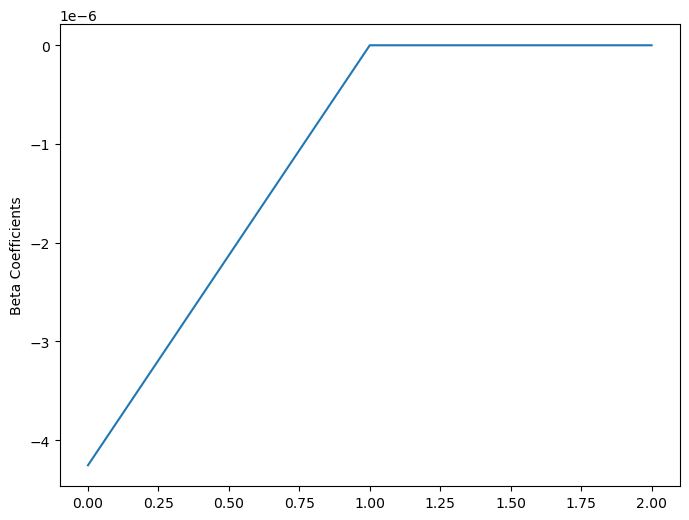

In [37]:
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')

In [39]:
# Your answer goes here
coefsArray = np.array(lrModel.coefficients)  # convert to np.array
coefsDF = pd.DataFrame(coefsArray, columns=['coefs'])  # to pandas

coefsDF = coefsDF.merge(featureCols, left_index=True, right_index=True)  # join it with featureCols we created above
coefsDF.sort_values('coefs', inplace=True)  # Sort them
coefsDF.head()

,coefs,name
0,-0.000004,CommercialData_EstimatedAreaMedianHHIncome
1,0.000000,CommercialData_AreaMedianEducationYears
2,0.000000,CommercialData_AreaMedianHousingValue


we see that from the coefficients, three columns that we used to predict voter turnout are approximately 0. In linear regression if a $\beta_i=0$ and its $\sigma\left(\beta_i\right)=0$, it means the linear regression model wasn't able to find a linear relationship between the dependent variable $y$ (voter turnout) and independent variable $x_i$ (income, housing value, education year). But this doesn't mean there is no relationship between $y$ and $x_i$. There could instead be a nonlinear, or other, interaction going on between them since linear regression will only be able to model linear problems. 

In our case, the model failed to find a linear relationship between income, housing, education year and voter turnout. The above metric can be further visualized in the plot below.

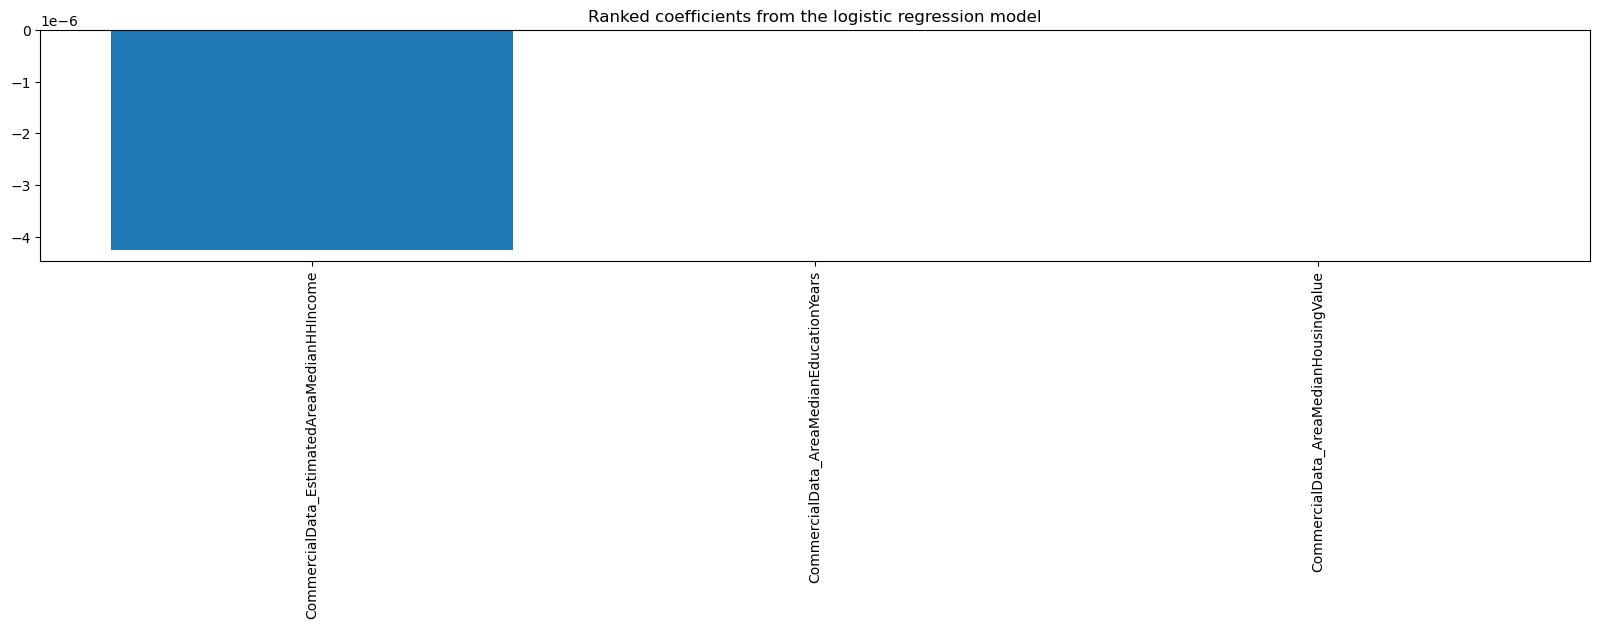

In [40]:
plt.rcParams["figure.figsize"] = (20,3)
# Your answer goes here
plt.xticks(rotation=90)
plt.bar(coefsDF.name, coefsDF.coefs)
plt.title('Ranked coefficients from the logistic regression model')
plt.show()

In conclusion, we found that none of the income, housing value, or education can predict the voter turnout with linear regression. This means that there does not exist a linear relationship between income, housing value, and education, and voter turnout

## Discussion/Insights

## Conclusion

#### What differences do we observe between the General and Primary elections?
We looked at the voter turnout for one state on the West coast, California and one state on the East coast, New York. Furthermore, we also compared the voter turnout behavior between year groups (2008-2010) vs (2016-2018) to see if time is a signfiicant factor.
- Overall, General turnout was higher than Primary turnout.
    - In California, specifically 2008, General turnout in most counties are around double the Primary turnout. In 2010, Primary turnout increases in proportion to General turnout.
    - In New York, Primary turnout is consistently low (0-10%) compared to General turnout (60%+).
    - In California's 2016 elections, there was a peak in Primary turnout, which may have been influenced by the Presidential election.
    - In New York's 2016 elections, suprisingly, the Primary turnout actually dropped below Primary turnout rates in 2008, 2010 and 2018.
    - Between year groups (2008-2010 vs 2016-2018), there are no other significant changes in voter turnout behavior in the two states.

- Although the voter behavior in each state will vary, looking at California and New York's voting turnout will hopefully give us a better idea of the voting behavior trends (and why they occur) in the neighboring states on the West and East coasts.

#### What are the factors that could lead to different voter turnouts?
We tried to find if there is correlation between factors such as party preference, education, income, and housing values and voter turn out in 2016, and here are several conclusion we had:
- Party preference is not correlated with voter turnouts in both East and West coast states.
- With higher education(longer in years), people will be more likely to participate in the election voting processes.
- With higher income level, the voter turnout will be higher.
- With higher housing values, registered voters will vote at a greater chance.

In General, party preference is not a variable that would affect voter turnout in both East and West coast states and in both red and blue states. However, education, income, and housing values can somehow drive the voter turnout to be higher or lower due to difference levels of those factors. We might can predict the behavior of voter turnouts by education, income, or housing values.